# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Context:
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.


Objective:
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Price paid per order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Write your code here to import necessary libraries for the project

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Understanding the structure of the data




In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/GL_AIML_Course/FoodHub/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0             30.750         Weekend  Not given                     25   
1             12.080         Weekend  Not given                     25   
2             12.230         Weekday          5                     23   
3             29.200         Weekend          3                     25   
4             11.590         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

### How many rows and columns are present in the data?

In [ ]:
# Write your code here
data.shape

(1898, 9)

#### Observations:




1. There are 1898 rows and 9 columns


### What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


  



1. There are attributes of different types (*int*, *float*, *object*) in the data.
2. There are 1 float (or decimal) type, 4 int (or integer) types and 4 object (or string) type columns in the dataset.
3.   order_id, customer_id, food_preparation_time & delivery_time are integer types.
4. restaurant_name, cuisine_type, day_of_the_week and rating are string types
5.   cost_of_the_order is decimal type.






### Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:




1. As you can see zero is returned for isnull function for all columns, hence we can conclude that there are  no missing values in any of the columns.


### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
data.describe().T

count        mean        std         min         25%  \
order_id              1898.000 1477495.500    548.050 1476547.000 1477021.250   
customer_id           1898.000  171168.478 113698.140    1311.000   77787.750   
cost_of_the_order     1898.000      16.499      7.484       4.470      12.080   
food_preparation_time 1898.000      27.372      4.632      20.000      23.000   
delivery_time         1898.000      24.162      4.973      15.000      20.000   

                              50%         75%         max  
order_id              1477495.500 1477969.750 1478444.000  
customer_id            128600.000  270525.000  405334.000  
cost_of_the_order          14.140      22.297      35.410  
food_preparation_time      27.000      31.000      35.000  
delivery_time              25.000      28.000      33.000

In [ ]:
min_p = data['food_preparation_time'].min()
print(f'The minimum time it takes for the food to be prepared is {min_p} minutes')
avg_p = data['food_preparation_time'].mean()
print(f'The maximum time it takes for the food to be prepared is {avg_p.round(2)} minutes')
max_p = data['food_preparation_time'].max()
print(f'The maximum time it takes for the food to be prepared is {max_p} minutes')

The minimum time it takes for the food to be prepared is 20 minutes
The maximum time it takes for the food to be prepared is 27.37 minutes
The maximum time it takes for the food to be prepared is 35 minutes


#### Observations:




1.   The statistical summary is available for all the numerical variables.
2. The dataset consists of 1898 order records for various restaurants.
3. The minimum time taken to prepare food is 20 minutes once the order is placed.
4. The average time taken to prepare food is 27.37 minutes once the order is placed.
5. The maximum time taken to prepare food is 35 minutes once the order is placed.



### How many orders are not rated?

In [ ]:
# Write the code here
not_rated = data['rating'].value_counts()['Not given']
print(f'There are {not_rated} orders that are not rated.')

There are 736 orders that are not rated.


#### Observations:




1. There are 736 orders that were not rated.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

### First let's analyse numerical attributes

<font color = cyan>

1. cost_of_the_order

</font>

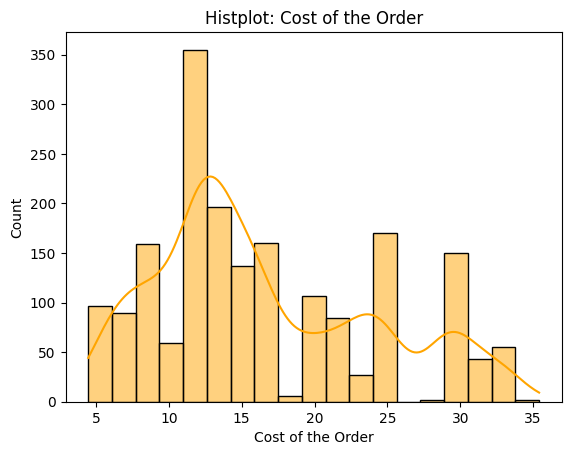

In [ ]:
# Write the code here
plt.title('Histplot: Cost of the Order')
plt.xlabel('Cost of the Order')
sns.histplot(data=data, x='cost_of_the_order', color='orange', kde=True);

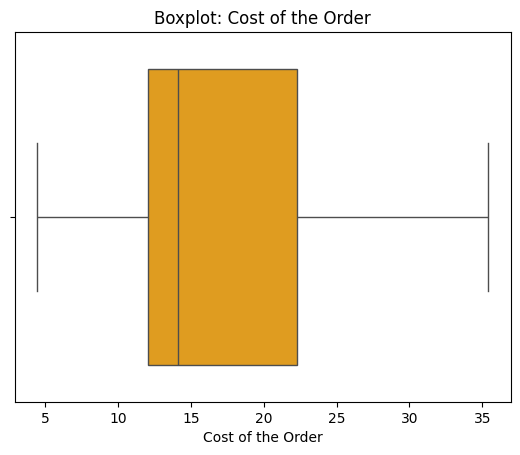

In [ ]:
plt.title('Boxplot: Cost of the Order')
plt.xlabel('Cost of the Order')
sns.boxplot(data=data, x='cost_of_the_order', color='orange');

In [ ]:
data['cost_of_the_order'].max()

35.41

In [ ]:
data['cost_of_the_order'].min()

4.47

In [ ]:
data['cost_of_the_order'].mean()

16.498851422550054

In [ ]:
data['cost_of_the_order'].median()

14.14

### Observations



1. Cost of the order is a slightly right skewed distribution as you can see from the kde line in the histplot.
2. The above point is also evident from the median value being towards the left whiskar in the boxplot, hence the distribution is skewed right.
3. The left whisker is shorter than the right whisker.
4. There are no outliers in the Cost of the order values.
5. The minimum cost of order is 4.47, maximum is 35.41.
6. Average cost is 16.50
7. Median cost is 14.14



<font color = cyan>
2. food_preparation_time

</font>

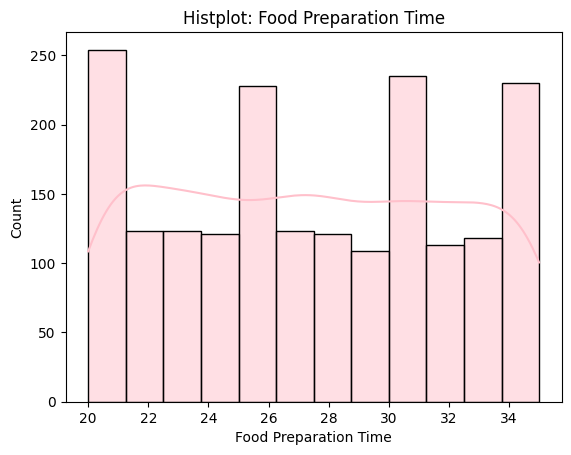

In [ ]:
plt.title('Histplot: Food Preparation Time')
plt.xlabel('Food Preparation Time')
sns.histplot(data=data, x='food_preparation_time', color='pink', kde=True);

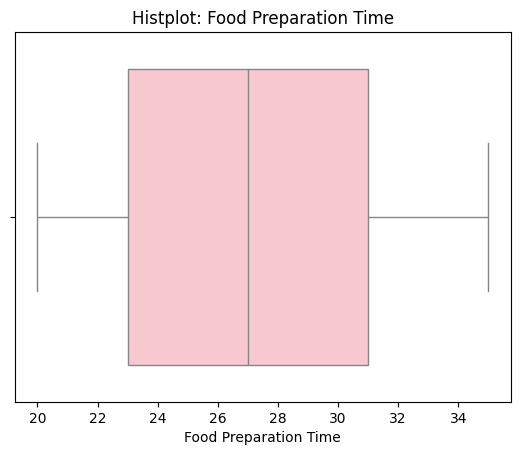

In [ ]:
plt.title('Histplot: Food Preparation Time')
plt.xlabel('Food Preparation Time')
sns.boxplot(data=data, x='food_preparation_time', color='pink');

In [ ]:
data['food_preparation_time'].max()

35

In [ ]:
data['food_preparation_time'].min()

20

In [ ]:
data['food_preparation_time'].mean()

27.371970495258168

In [ ]:
data['food_preparation_time'].median()

27.0

### Observations



1. Food preparation time is an almost normal distribution as you can see from the boxplot.
2. The above point is also evident from the median value being almost in the center in the boxplot.
3. The left whisker is slightly shorter than the right whisker, though there is not a big difference.
4. There are no outliers in the food preparation time values.
5. The minimum preparation time is 20 mins, maximum is 35 mins.
6. Average time is 27.37
7. Median is 27
8. As you can see the Average and Median are almost the same this is a normal distribution.


<font color = cyan>
3. delivery_time

</font>

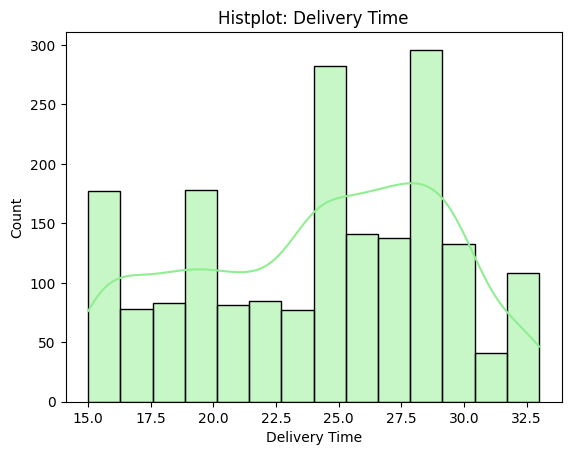

In [ ]:
plt.title('Histplot: Delivery Time')
plt.xlabel('Delivery Time')
sns.histplot(data=data, x='delivery_time', color='lightgreen', kde=True);

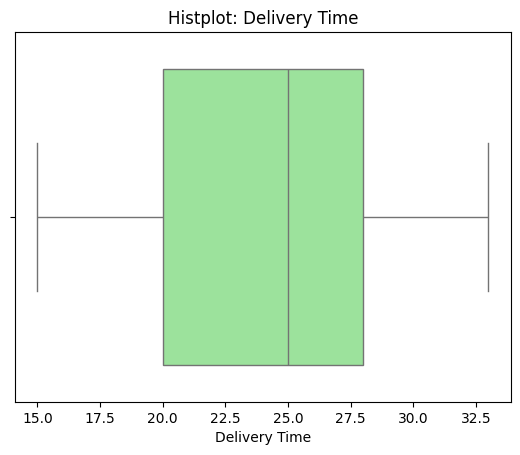

In [ ]:
plt.title('Histplot: Delivery Time')
plt.xlabel('Delivery Time')
sns.boxplot(data=data, x='delivery_time', color='lightgreen');

In [ ]:
data['delivery_time'].max()

33

In [ ]:
data['delivery_time'].min()

15

In [ ]:
data['delivery_time'].mean()

24.161749209694417

In [ ]:
data['delivery_time'].median()

25.0

### Observations


1. Delivery Time is a slightly left skewed distribution as you can see from the kde line in the histplot.
2. The above point is also evident from the median value being towards the right whiskar in the boxplot, hence the distribution is skewed left.
3. The right whisker is shorter than the left whisker.
4. There are no outliers in the Delivery Time values.
5. The Delivery Time of order is 15 min, maximum is 33 mins.
6. Average Delivery Time is 24.16
7. Median Delivery Time is 25

<font color = cyan>
4. customer_id

</font>

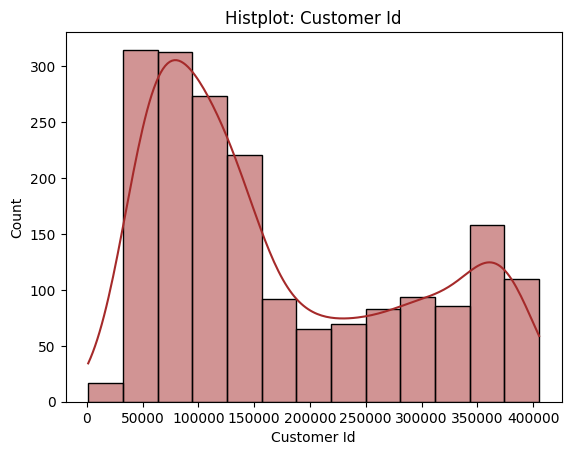

In [ ]:
plt.title('Histplot: Customer Id')
plt.xlabel('Customer Id')
sns.histplot(data=data, x='customer_id', color='brown', kde=True);

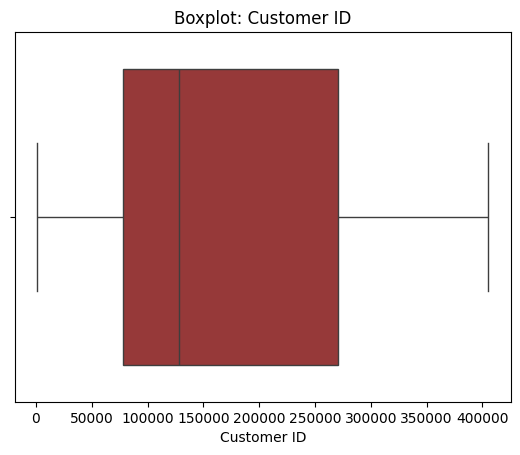

In [ ]:
plt.title('Boxplot: Customer ID')
plt.xlabel('Customer ID')
sns.boxplot(data=data, x='customer_id', color='brown');

In [ ]:
cust_count = data['customer_id'].nunique()
print(f'{cust_count} customers have placed order on the platform')


1200 customers have placed order on the platform


In [ ]:
order_count = data.shape[0]
print(f'{order_count} are the total number of orders placed via the platform')

1898 are the total number of orders placed via the platform


In [ ]:
most_frequent_customer = data['customer_id'].value_counts().idxmax()
print(f'The most frequent customer is having customer id = {most_frequent_customer}')

The most frequent customer is having customer id = 52832


In [ ]:
most_frequent_customer_order_count = data['customer_id'].value_counts().max()
print(f'Number of orders placed by he most frequent customer is {most_frequent_customer_order_count}')

Number of orders placed by he most frequent customer is 13


In [ ]:
repeat_counts = data['customer_id'].value_counts()
repeat_customers = repeat_counts[repeat_counts > 1]
print(f'There are {repeat_customers.shape[0]} repeat customers, i.e. customers who have placed order on the platform more than once')

There are 416 repeat customers, i.e. customers who have placed order on the platform more than once


### Observations


1. Customer ID is a slightly right skewed distribution as you can see from the kde line in the histplot.
2. The above point is also evident from the median value being towards the left whiskar in the boxplot, hence the distribution is skewed right.
3. The left whisker is shorter than the right whisker.
4. There are no outliers in the Customer ID values.
5. Even though 1898 orders were placed, 1200 unique customers have placed orders and out of these 1200, 416 customers have placed more than one order.
6. Maximum numbers of orders were placed by customer id 52832, and this customer placed 13 orders.

<font color = cyan>
5. order_id

</font>

In [ ]:
unique_order_count = data['order_id'].nunique()
order_count = data['order_id'].count()
print(f'There are total {order_count} orders, and there are {unique_order_count} unique order_ids')

There are total 1898 orders, and there are 1898 unique order_ids


In [ ]:
s_df = data.copy()

In [ ]:
sorted_df = s_df.sort_values(by='order_id', ascending = True)

In [ ]:
first_order = sorted_df['order_id'].head(1).values[0]
print(f'The first customer to place the order received order id = {first_order}')

The first customer to place the order received order id = 1476547


In [ ]:
latest_order = sorted_df['order_id'].tail(1).values[0]
print(f'The most recent customer to place the order received order id = {latest_order}')

The most recent customer to place the order received order id = 1478444


In [ ]:
total_orders = latest_order - first_order
print('Total orders:', total_orders+1)

Total orders: 1898


In [ ]:
no_of_digits_max = data['order_id'].astype(str).str.len().max()
no_of_digits_min = data['order_id'].astype(str).str.len().min()

if no_of_digits_max == no_of_digits_min:
  print(f'The order_id is a {no_of_digits_max} digit number sequence')

The order_id is a 7 digit number sequence


### Observations


1. There are total 1898 orders, and there are 1898 unique order_ids which indicate that no two orders have same order_id.
2. The order_ids format is of incremental numbers.
3. The first customer to place the order received order id = 1476547
4. The most recent customer to place the order received order id = 1478444
5. The order_id is a 7 digit number sequence

*Assumptions: the company is using order ids as incremental numbers and not decremental.*



### Now let's analyse categorical attributes



<font color = cyan>
6. restaurant_name

</font>

<Axes: title={'center': 'Countplot: Restaurant Name'}, xlabel='Count', ylabel='restaurant_name'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 140 (\x8c) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 142 (\x8e) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 140 (\x8c) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



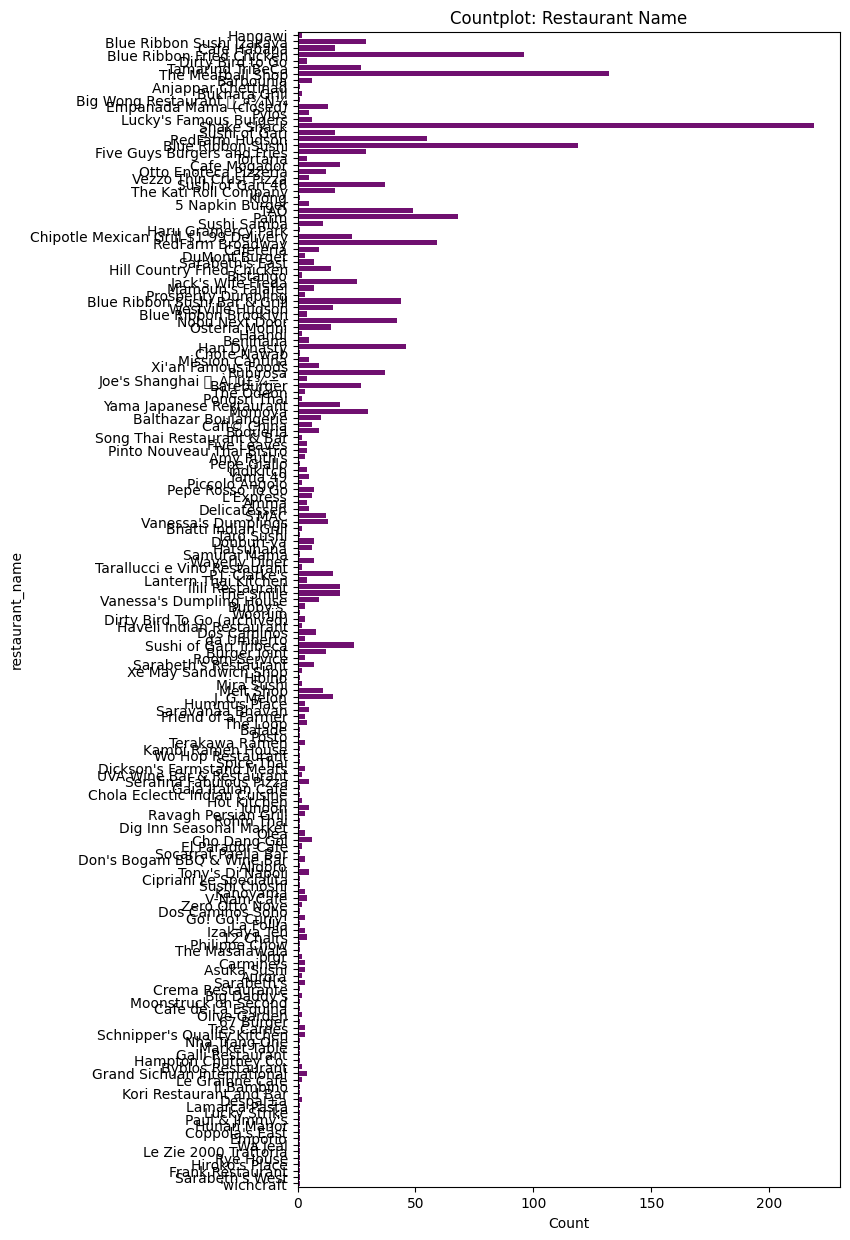

In [ ]:
plt.figure(figsize=(7,15))
plt.title('Countplot: Restaurant Name')
plt.xlabel('Count')
sns.countplot(data=data, y='restaurant_name', color = 'purple', orient='h')

In [ ]:
rest_counts = data['restaurant_name'].nunique()
print(f'There are {rest_counts} restaurants from where order has been placed via this platform')

There are 178 restaurants from where order has been placed via this platform


In [ ]:
repeat_rcounts = data['restaurant_name'].value_counts()
repeat_restaurants = repeat_rcounts[repeat_rcounts > 100]
print(f'There are {repeat_restaurants.count()} restaurants from where more than 100 orders have been placed\n')
print(repeat_rcounts.head(repeat_restaurants.count()))

There are 3 restaurants from where more than 100 orders have been placed

restaurant_name
Shake Shack          219
The Meatball Shop    132
Blue Ribbon Sushi    119
Name: count, dtype: int64


### Observations



1. There are 178 restaurants from where order has been placed via this platform.
2. There are 3 restaurants from where more than 100 orders have been placed (these seem to be the most popular ones).


<font color = cyan>
7. cuisine_type

</font>

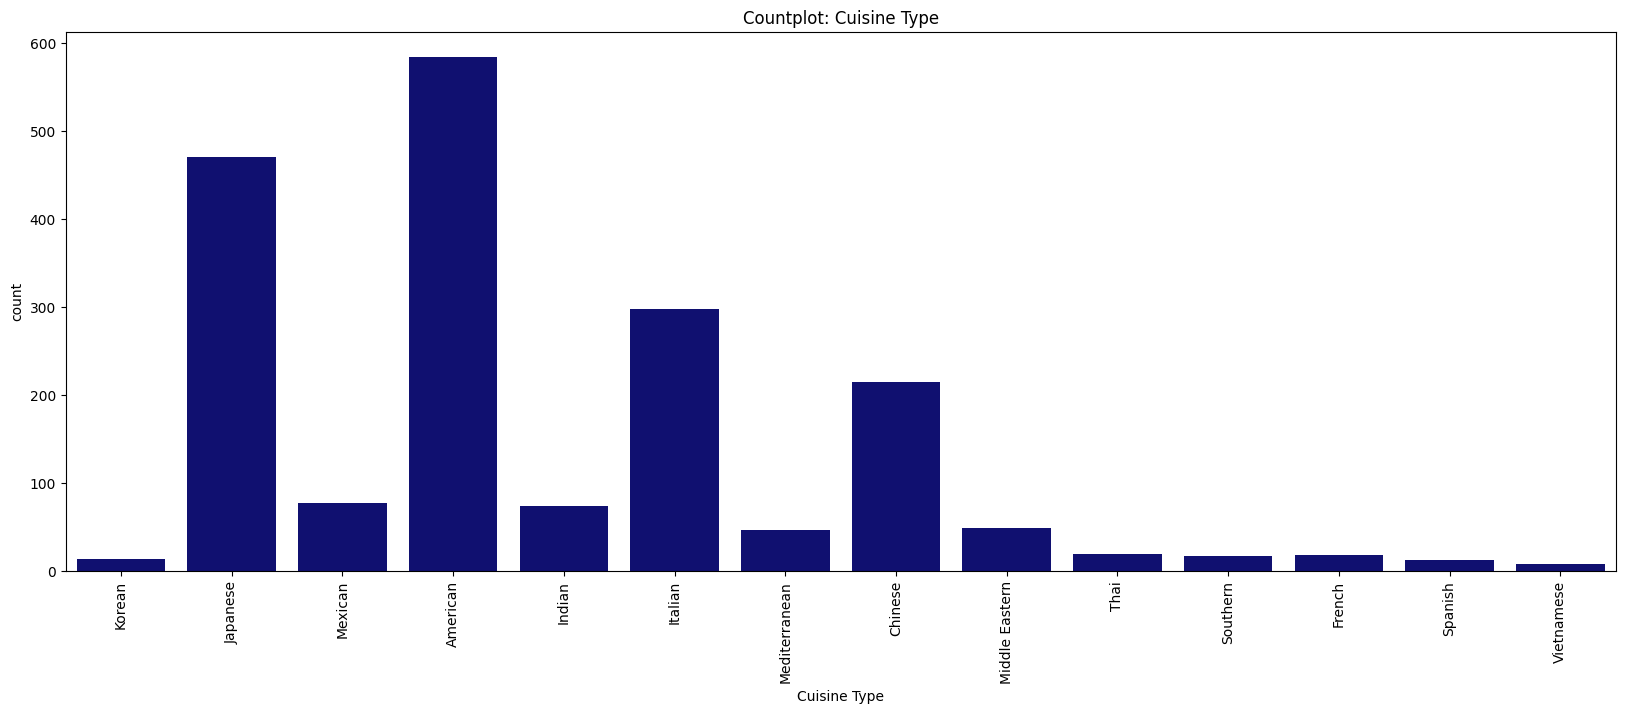

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title('Countplot: Cuisine Type')
plt.xlabel('Cuisine Type')
sns.countplot(data=data, x='cuisine_type', color = 'navy');

In [ ]:
cuisine_counts = data['cuisine_type'].nunique()
print(f'There are {cuisine_counts} different/unique cuisines in the dataset')

There are 14 different/unique cuisines in the dataset


In [ ]:
top_cuisine_freq = data['cuisine_type'].value_counts()
top_cuisine_freq = top_cuisine_freq.reset_index()

top_cuisine = data['cuisine_type'].value_counts().idxmax()

top_cuisine_f = top_cuisine_freq['count'].iloc[0]
second_top_cuisine_f = top_cuisine_freq['count'].iloc[1]
third_top_cuisine_f = top_cuisine_freq['count'].iloc[2]
fourth_top_cuisine_f = top_cuisine_freq['count'].iloc[3]

second_top_cuisine = top_cuisine_freq['cuisine_type'].iloc[1]
third_top_cuisine = top_cuisine_freq['cuisine_type'].iloc[2]
fourth_top_cuisine = top_cuisine_freq['cuisine_type'].iloc[3]

print(f'The most popular cuisine is {top_cuisine} with {top_cuisine_f} orders, followed by {second_top_cuisine}, {third_top_cuisine} and {fourth_top_cuisine} with {second_top_cuisine_f}, {third_top_cuisine_f} and {fourth_top_cuisine_f} orders respectively.')

The most popular cuisine is American with 584 orders, followed by Japanese, Italian and Chinese with 470, 298 and 215 orders respectively.


In [ ]:
bottom_cuisine_freq = data['cuisine_type'].value_counts()
bottom_cuisine = data['cuisine_type'].value_counts().idxmin()

print(f'The least popular cuisine is {bottom_cuisine} with just {bottom_cuisine_freq.tail(1).values[0]} orders')

The least popular cuisine is Vietnamese with just 7 orders


### Observations


1. There are 14 different/unique cuisines in the dataset.
2. The most popular cuisine is American with 584 orders, followed by Japanese, Italian and Chinese with 470, 298 and 215 orders respectively.
3. The least popular cuisine is Vietnamese with just 7 orders.



<font color = cyan>
8. day_of_the_weelk

</font>

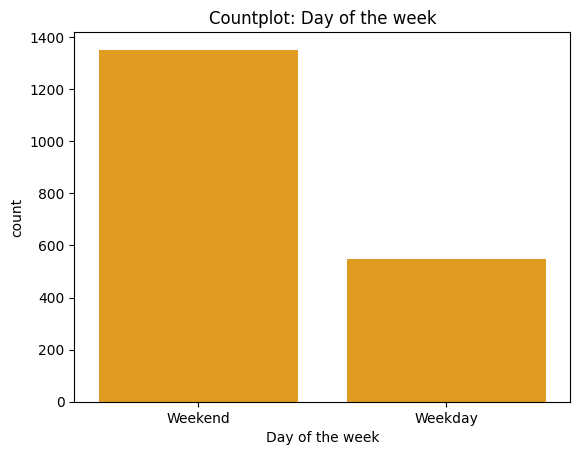

In [ ]:
plt.title('Countplot: Day of the week')
plt.xlabel('Day of the week')
sns.countplot(data=data, x='day_of_the_week', color = 'orange');

In [ ]:
day_freq = data['day_of_the_week'].value_counts()
day_freq = day_freq.reset_index()

weekday_value = day_freq.loc[day_freq['day_of_the_week'] == 'Weekday', 'count'].values[0]
weekend_value = day_freq.loc[day_freq['day_of_the_week'] == 'Weekend', 'count'].values[0]

print(f'There were {weekday_value} orders placed on weekdays and {weekend_value} orders placed over the weekends.')

There were 547 orders placed on weekdays and 1351 orders placed over the weekends.


### Observations


1. There were 547 orders placed on weekdays and 1351 orders placed over the weekends.
2. The orders placed on weekends were more than double of what was placed on weekdays.

<font color = cyan>
9. rating

</font>

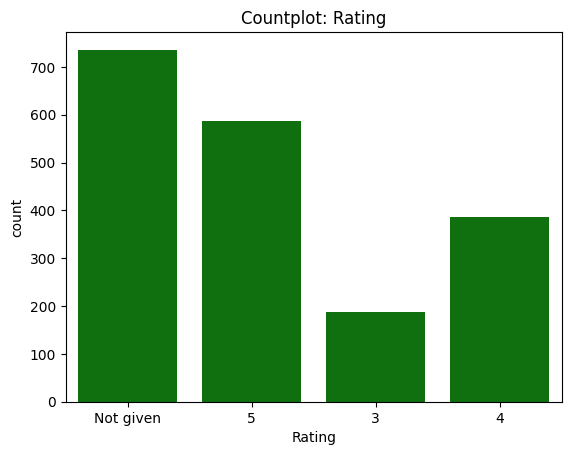

In [ ]:
plt.title('Countplot: Rating')
plt.xlabel('Rating')
sns.countplot(data=data, x='rating', color = 'green');

In [ ]:
day_freq = data['rating'].value_counts()
day_freq = day_freq.reset_index()

Rating_not_given = day_freq.loc[day_freq['rating'] == 'Not given', 'count'].values[0]
Rating_3 = day_freq.loc[day_freq['rating'] == '3', 'count'].values[0]
Rating_4 = day_freq.loc[day_freq['rating'] == '4', 'count'].values[0]
Rating_5 = day_freq.loc[day_freq['rating'] == '5', 'count'].values[0]


print(f'There were {Rating_not_given} orders for which rating was not given.')
print(f'There were {Rating_3} orders for which rating 3 was given.')
print(f'There were {Rating_4} orders for which rating 4 was given.')
print(f'There were {Rating_5} orders for which rating 5 was given.')


There were 736 orders for which rating was not given.
There were 188 orders for which rating 3 was given.
There were 386 orders for which rating 4 was given.
There were 588 orders for which rating 5 was given.


In [ ]:
total_records = data.shape[0]
not_rated_percentage = (Rating_not_given/total_records) * 100
print(f'There were {not_rated_percentage.round(2)}% orders that were not rated.')

There were 38.78% orders that were not rated.


In [ ]:
his = px.histogram(data, x="rating")
his.show()

### Observations

1. There were 736 orders for which rating was not given which constitues to 38.78%.
2. There were 188 orders for which rating 3 was given.
3. There were 386 orders for which rating 4 was given.
4. There were 588 orders for which rating 5 was given.

### Now let's analyse derived attributes


<font color = cyan>
9. total_time (derived)

</font>

In [ ]:
cdata = data.copy()
cdata['total_time'] = cdata['food_preparation_time'] + cdata['delivery_time']

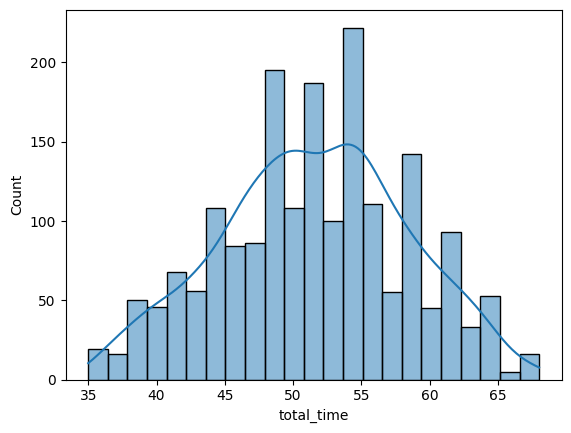

In [ ]:
sns.histplot(data=cdata, x='total_time', kde=True);

In [ ]:
tot_time_min = cdata['total_time'].min()
tot_time_max = cdata['total_time'].max()
tot_time_avg = cdata['total_time'].mean()
tot_time_med = cdata['total_time'].median()

print(f'The Minimum Total Time is {tot_time_min}')
print(f'The Maximum Total Time is {tot_time_max}')
print(f'The Average Total Time is {tot_time_avg.round(2)}')
print(f'The Median Total Time is {tot_time_med}')


The Minimum Total Time is 35
The Maximum Total Time is 68
The Average Total Time is 51.53
The Median Total Time is 52.0


### Observations


1. The total_time is almost normally distributed, also evident from the Mean and Median being very close.
2. The Minimum Total Time is 35
3. The Maximum Total Time is 68
4. The Average Total Time is 51.53
5. The Median Total Time is 52.0

### Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
top5_counts = data['restaurant_name'].value_counts()
top5_counts = top5_counts.reset_index()
print(top5_counts.head(5))

top_1 = top5_counts['restaurant_name'].iloc[0]
top_1_c = top5_counts['count'].iloc[0]
top_2 = top5_counts['restaurant_name'].iloc[1]
top_2_c = top5_counts['count'].iloc[1]
top_3 = top5_counts['restaurant_name'].iloc[2]
top_3_c = top5_counts['count'].iloc[2]
top_4 = top5_counts['restaurant_name'].iloc[3]
top_4_c = top5_counts['count'].iloc[3]
top_5 = top5_counts['restaurant_name'].iloc[4]
top_5_c = top5_counts['count'].iloc[4]

print(f'The top five restaurants in terms of the number of orders recerived are {top_1}, {top_2}, {top_3}, {top_4} and {top_5} with {top_1_c}, {top_2_c}, {top_3_c}, {top_4_c} and {top_5_c} orders respectively.')

             restaurant_name  count
0                Shake Shack    219
1          The Meatball Shop    132
2          Blue Ribbon Sushi    119
3  Blue Ribbon Fried Chicken     96
4                       Parm     68
The top five restaurants in terms of the number of orders recerived are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm with 219, 132, 119, 96 and 68 orders respectively.


In [ ]:
top_5_sum = top5_counts['count'].nlargest(5).sum()
print(f'The total orders received by top 5 restaurants is {top_5_sum}.')
total_sum = top5_counts['count'].sum()
top_5_percent = (top_5_sum/total_sum) * 100
print(f'The sum total of orders received by top 5 restaurants constitutes {top_5_percent.round(2)}% of all the total orders received on the platform')

The total orders received by top 5 restaurants is 634.
The sum total of orders received by top 5 restaurants constitutes 33.4% of all the total orders received on the platform


#### Observations


1. The top five restaurants in terms of the number of orders recerived are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm with 219, 132, 119, 96 and 68 orders respectively.
2. The total orders received by top 5 restaurants is 634.
3. The sum total of orders received by top 5 restaurants constitutes 33.4% of all the total orders received on the platform


### Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
day_of_week = data[data['day_of_the_week'] == 'Weekend']
most_popular = day_of_week['cuisine_type'].value_counts().idxmax()
print(f'The most popular cuisine on weekend is {most_popular}.')

The most popular cuisine on weekend is American.


#### Observations



1. The most popular cuisine on weekend is American.


### What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
count_more_than_twenty = (data['cost_of_the_order'] > 20).sum()
percent_more_than_twenty = (count_more_than_twenty/data['cost_of_the_order'].count()) * 100
print(f'The percentage of the orders that cost more than 20 dollars is {percent_more_than_twenty.round(2)} %')

The percentage of the orders that cost more than 20 dollars is 29.24 %


#### Observations



1. The percentage of the orders that cost more than 20 dollars is 29.24 %




### What is the mean order delivery time?

In [ ]:
# Write the code here
mean_order_delivery_time = data['delivery_time'].mean()
print(f'The mean delivery time is {mean_order_delivery_time.round(2)} minutes' )


The mean delivery time is 24.16 minutes


#### Observations



1. The mean delivery time is 24.16 minutes



### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Write the code here
new_df = data['customer_id'].value_counts()
counts_df = new_df.reset_index().rename(columns={"index": "value", 0: "count"})
print(counts_df.head(3))

first_customer_id = counts_df['customer_id'].iloc[0]
first_customer_order_count = counts_df['count'].iloc[0]
second_customer_id = counts_df['customer_id'].iloc[1]
second_customer_order_count = counts_df['count'].iloc[1]
third_customer_id = counts_df['customer_id'].iloc[2]
third_customer_order_count = counts_df['count'].iloc[2]

print(f'\nTop frequent customer has placed {first_customer_order_count} orders and their Id is {first_customer_id}.')
print(f'Second frequent customer has placed {second_customer_order_count} orders and their Id is {second_customer_id}.')
print(f'Third frequent customer has placed {third_customer_order_count} orders and their Id is {third_customer_id}.')


   customer_id  count
0        52832     13
1        47440     10
2        83287      9

Top frequent customer has placed 13 orders and their Id is 52832.
Second frequent customer has placed 10 orders and their Id is 47440.
Third frequent customer has placed 9 orders and their Id is 83287.


#### Observations



1. Top frequent customer has placed 13 orders and their Id is 52832.
2. Second frequent customer has placed 10 orders and their Id is 47440.
3. Third frequent customer has placed 9 orders and their Id is 83287.


### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


#### 1. customer_id, day_of_the_week


  day_of_the_week  customer_count
0         Weekend            1351
1         Weekday             547




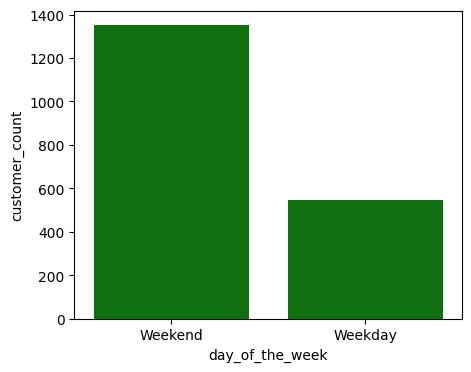

In [ ]:
cust_on_dow = data.groupby(['day_of_the_week'])['customer_id'].count()
cust_on_dow = cust_on_dow.reset_index()
cust_on_dow = cust_on_dow.drop_duplicates()
cust_on_dow.rename(columns={'customer_id': 'customer_count'}, inplace=True)
cust_on_dow = cust_on_dow.sort_values(by='customer_count', ascending = False)
cust_on_dow.reset_index(drop=True, inplace=True)

print(cust_on_dow)
print('\n')

plt.figure(figsize=(5,4))
sns.barplot(data=cust_on_dow, x='day_of_the_week', y='customer_count', color = 'green');
plt.show()

#### Observations


1. As you can see the customers placing orders on weekends is much more than customers placing orders on weekday.

#### 2. customer_id , cuisine_type


      cuisine_type  customer_count
0         American             584
1         Japanese             470
2          Italian             298
3          Chinese             215
4          Mexican              77
5           Indian              73
6   Middle Eastern              49
7    Mediterranean              46
8             Thai              19
9           French              18
10        Southern              17
11          Korean              13
12         Spanish              12
13      Vietnamese               7




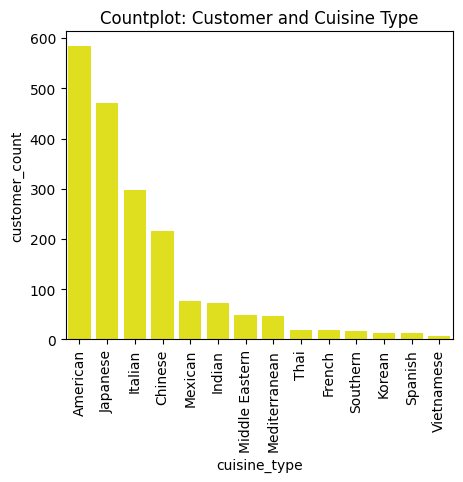

In [ ]:
cust_ct = data.groupby(['cuisine_type'])['customer_id'].count()
cust_ct = cust_ct.reset_index()
cust_ct_no_dup = cust_ct.drop_duplicates()
cust_ct_no_dup.rename(columns={'customer_id': 'customer_count'}, inplace=True)
cust_ct_no_dup = cust_ct_no_dup.sort_values(by='customer_count', ascending = False)
cust_ct_no_dup.reset_index(drop=True, inplace=True)

print(cust_ct_no_dup)
print('\n')

plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
plt.title('Countplot: Customer and Cuisine Type')
sns.barplot(data=cust_ct_no_dup, x='cuisine_type', y='customer_count', color = 'yellow');
plt.show()

#### Observations

1. Most of the customers prefer American cuisine, followed by Japanese, Italian, Chinese, Mexican, Indian, so and so forth.
2. Indian cuisine is 6th in popularity as per this dataset.
3. Least customers prefer Vietnamese cuisine.

#### 3. customer_id, restaurant_name

               restaurant_name  customer_count
0                  Shake Shack             219
1            The Meatball Shop             132
2            Blue Ribbon Sushi             119
3    Blue Ribbon Fried Chicken              96
4                         Parm              68
..                         ...             ...
173                      Klong               1
174          Kambi Ramen House               1
175                 Il Bambino               1
176                Hunan Manor               1
177              Lamarca Pasta               1

[178 rows x 2 columns]




/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 140 (\x8c) missing from current font.



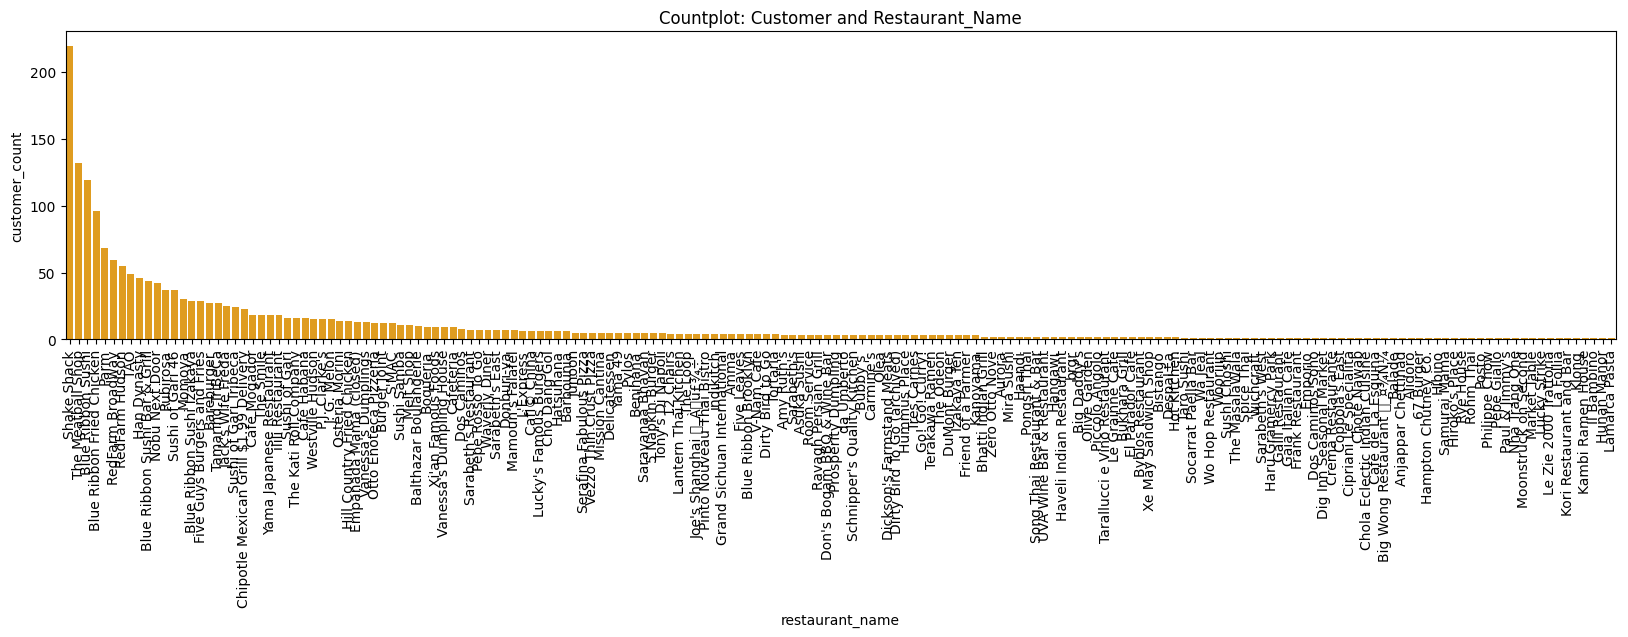

In [ ]:
cust_rn = data.groupby(['restaurant_name'])['customer_id'].count()
cust_rn = cust_rn.reset_index()
cust_rn_no_dup = cust_rn.drop_duplicates()
cust_rn_no_dup.rename(columns={'customer_id': 'customer_count'}, inplace=True)
cust_rn_no_dup = cust_rn_no_dup.sort_values(by='customer_count', ascending = False)
cust_rn_no_dup.reset_index(drop=True, inplace=True)

print(cust_rn_no_dup)
print('\n')

plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.title('Countplot: Customer and Restaurant_Name')
sns.barplot(data=cust_rn_no_dup, x='restaurant_name', y='customer_count', color = 'orange');
plt.show()

#### Observations

1. Shak Shack is the most popular restaurant with 219 customers.
2. The Meatball shop is the next popular restaurant with 132 customers

#### 4. rating, total_time

        restaurant_name  rating  total_time day_of_the_week
0     Blue Ribbon Sushi       5          68         Weekday
1             Hatsuhana       4          68         Weekday
2      RedFarm Broadway       4          68         Weekday
3      RedFarm Broadway       4          68         Weekday
4     The Meatball Shop       5          67         Weekday
...                 ...     ...         ...             ...
1157  Blue Ribbon Sushi       5          36         Weekend
1158       Cafe Mogador       3          36         Weekend
1159  Blue Ribbon Sushi       4          36         Weekend
1160   Westville Hudson       5          35         Weekend
1161   RedFarm Broadway       3          35         Weekend

[1162 rows x 4 columns]




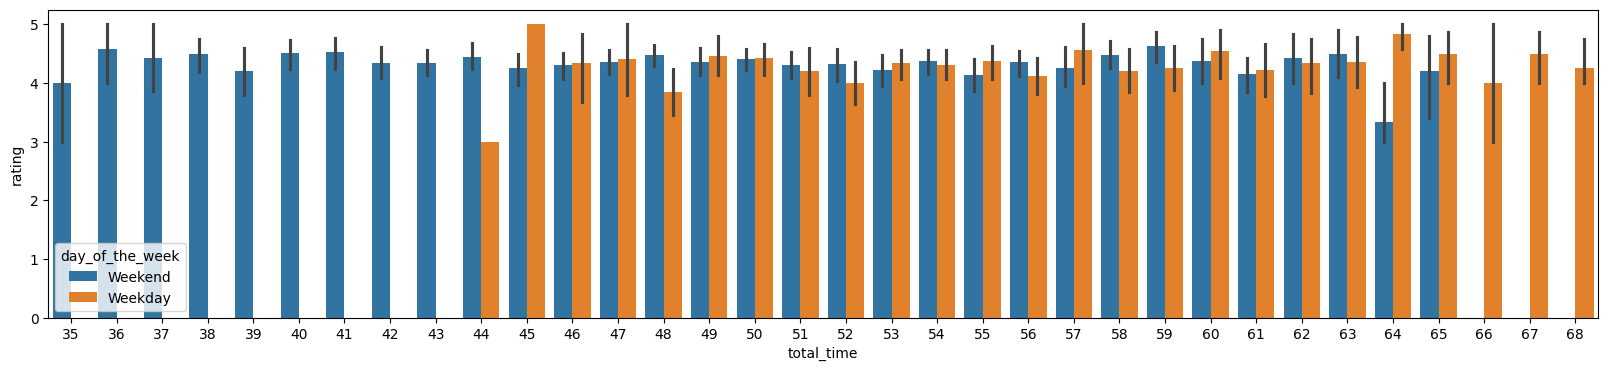

In [ ]:
rest_tt_new = data[['restaurant_name', 'rating', 'food_preparation_time', 'delivery_time', 'day_of_the_week']]
rest_tt_new = rest_tt_new[rest_tt_new['rating'] != 'Not given']
rest_tt_new['rating'] = rest_tt_new['rating'].astype(int)
rest_tt_new['total_time'] = rest_tt_new['food_preparation_time'] + rest_tt_new['delivery_time']
rest_tt_new = rest_tt_new.sort_values(by = 'total_time', ascending = False)
rest_tt_new.reset_index(drop=True, inplace=True)
rest_tt_new = rest_tt_new[['restaurant_name', 'rating', 'total_time', 'day_of_the_week']]

print(rest_tt_new)
print('\n')

plt.figure(figsize=(20,4))
sns.barplot(data=rest_tt_new, x='total_time', y='rating', hue='day_of_the_week');
plt.show()

#### Observations

1. The rating given to an order is not having any correlation to the total_time for order delivery, whether we analyse the weekday data or weekend.

#### 5. restaurant_name, rating

                   restaurant_name  rating
0                       'wichcraft   5.000
1             Ravagh Persian Grill   5.000
2    Chola Eclectic Indian Cuisine   5.000
3                      Chote Nawab   5.000
4                           Junoon   5.000
..                             ...     ...
151                       Woorijip   3.000
152              Byblos Restaurant   3.000
153                    Pepe Giallo   3.000
154                   Sushi Choshi   3.000
155                Sarabeth's West   3.000

[156 rows x 2 columns]




/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



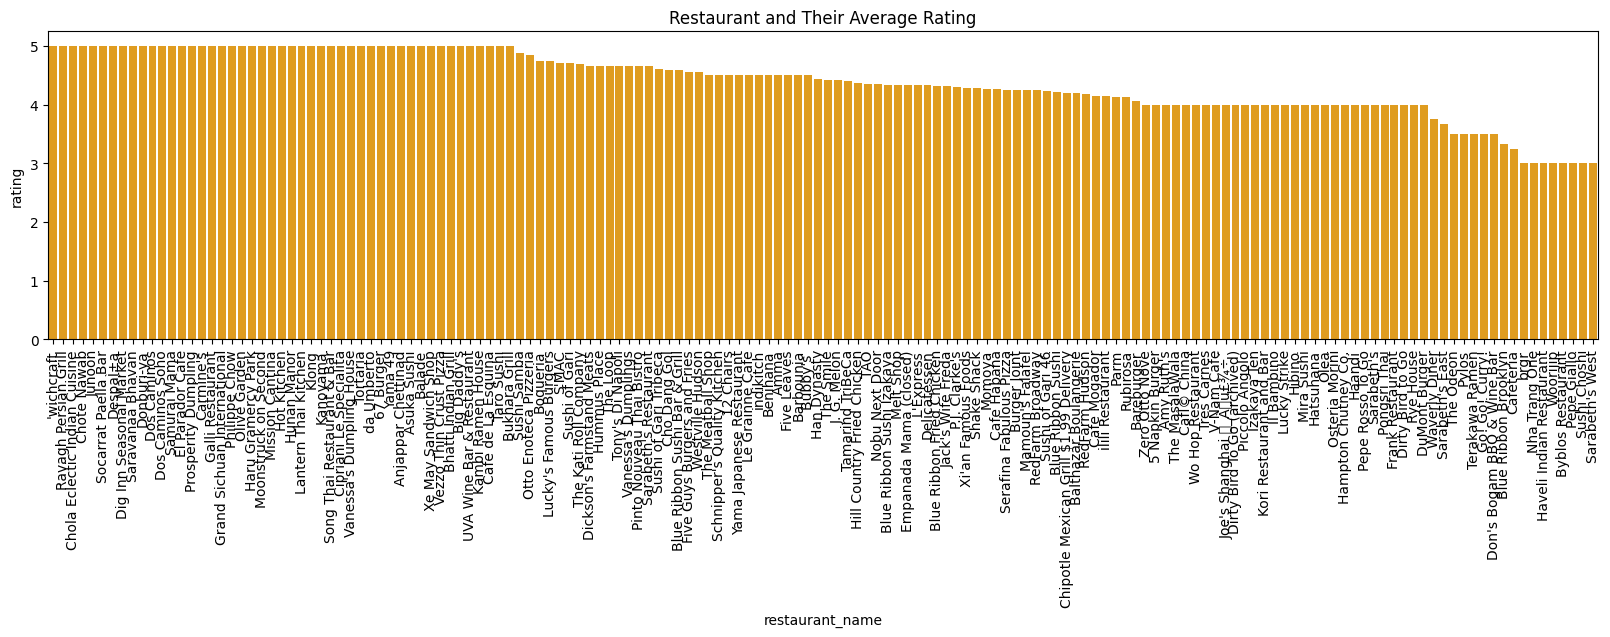

In [ ]:
rest_rt_new = data[['restaurant_name', 'rating']]
rest_rt_new = rest_rt_new[rest_rt_new['rating'] != 'Not given']
rest_rt_new['rating'] = rest_rt_new['rating'].astype(int)
rest_rt_final = (rest_rt_new.groupby(['restaurant_name'])['rating'].mean())
rest_rt_final = rest_rt_final.sort_values(ascending = False)
rest_rt_final = rest_rt_final.reset_index()

print(rest_rt_final)
print('\n')

plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.title('Restaurant and Their Average Rating')
sns.barplot(data=rest_rt_final, x='restaurant_name', y='rating', color = 'orange');
plt.show()

Minimum Rating received 3.0
Maximum Rating received 5.0




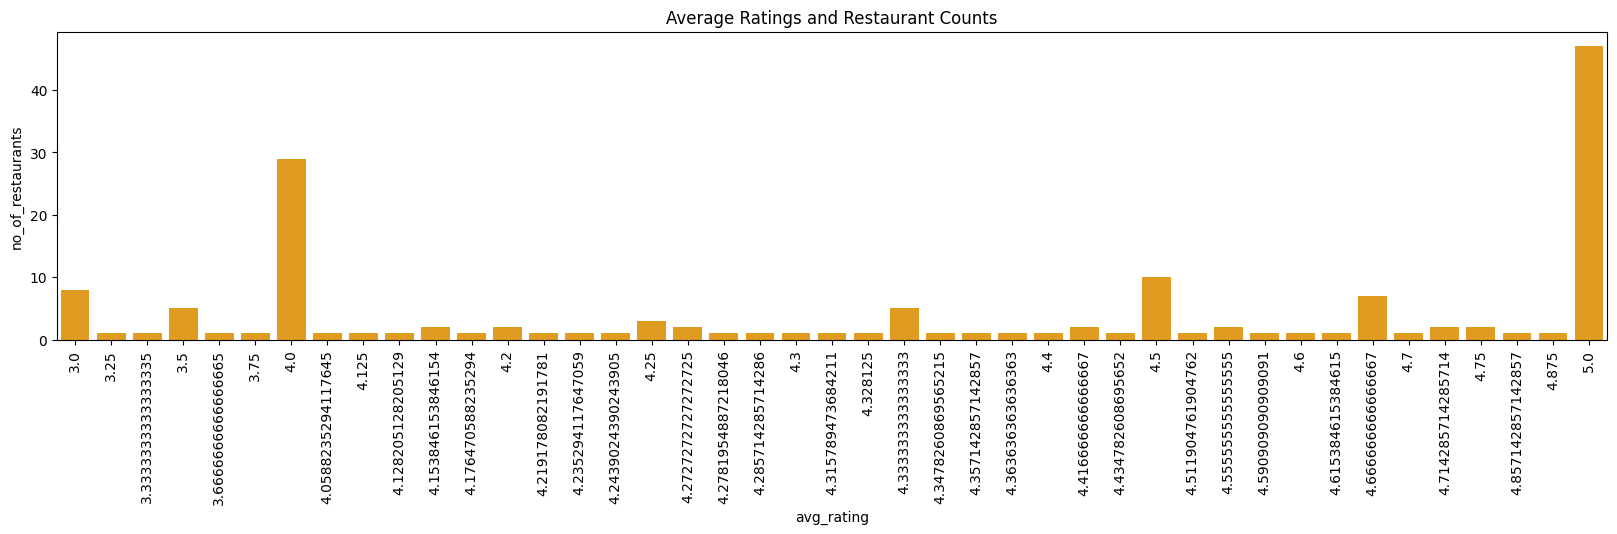

In [ ]:
top_rated = rest_rt_final.groupby(['rating'])['restaurant_name'].count()
top_rated = top_rated.reset_index()
top_rated.rename(columns={'restaurant_name': 'no_of_restaurants'}, inplace=True)
top_rated.rename(columns={'rating': 'avg_rating'}, inplace=True)
top_rated = top_rated.sort_values(by='no_of_restaurants', ascending = False)
top_rated = top_rated.reset_index()

print('Minimum Rating received', top_rated['avg_rating'].min() )
print('Maximum Rating received', top_rated['avg_rating'].max() )
print('\n')

plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.title('Average Ratings and Restaurant Counts')
sns.barplot(data=top_rated, x='avg_rating', y='no_of_restaurants', color = 'orange');
plt.show()

In [ ]:
top_rated5Star = rest_rt_final[rest_rt_final['rating'] == 5]
top_rated5Star.rename(columns={'rating': 'avg_rating'}, inplace=True)
top_rated5Star

<ipython-input-549-ff73c900b21b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



restaurant_name  avg_rating
0                      'wichcraft       5.000
1            Ravagh Persian Grill       5.000
2   Chola Eclectic Indian Cuisine       5.000
3                     Chote Nawab       5.000
4                          Junoon       5.000
5             Socarrat Paella Bar       5.000
6                        DespaÌ±a       5.000
7         Dig Inn Seasonal Market       5.000
8                Saravanaa Bhavan       5.000
9                      Donburi-ya       5.000
10                    Dos Caminos       5.000
11               Dos Caminos Soho       5.000
12                   Samurai Mama       5.000
13                El Parador Cafe       5.000
14            Prosperity Dumpling       5.000
15                      Carmine's       5.000
16               Galli Restaurant       5.000
17    Grand Sichuan International       5.000
18                  Philippe Chow       5.000
19                   Olive Garden       5.000
20             Haru Gramercy Park       5.000
21           Moonstruck on Second       5.000
22                Mission Cantina       5.000
23                    Hot Kitchen       5.000
24                    Hunan Manor       5.000
25           Lantern Thai Kitchen       5.000
26                          Klong       5.000
27                       Kanoyama       5.000
28     Song Thai Restaurant & Bar       5.000
29         Cipriani Le Specialita       5.000
30       Vanessa's Dumpling House       5.000
31                       Tortaria       5.000
32                     da Umberto       5.000
33                      67 Burger       5.000
34                        Yama 49       5.000
35             Anjappar Chettinad       5.000
36                    Asuka Sushi       5.000
37                         Balade       5.000
38           Xe May Sandwich Shop       5.000
39         Vezzo Thin Crust Pizza       5.000
40            Bhatti Indian Grill       5.000
41                    Big Daddy's       5.000
42      UVA Wine Bar & Restaurant       5.000
43              Kambi Ramen House       5.000
44             Cafe de La Esquina       5.000
45                     Taro Sushi       5.000
46                  Bukhara Grill       5.000

#### Observations

1. There are no ratings below 3.
2. There are 47 restaurants that have average rating of 5.

#### 6. customer_id, cost of the order

In [ ]:
exp_cust = data[['cost_of_the_order', 'customer_id', ]]
exp_cust=exp_cust.reset_index()

   customer_id  total_spending
0        52832         225.800
1       250494         183.830
2        47440         158.180
3       276192         146.460
4        83287         139.310
5       259341         130.810
6        97991         122.030
7        82041         120.920
8       115213         115.400
9        60039         109.760
10       97079         107.280
11       64153         103.170
12      127149         103.160
13       60052         102.240




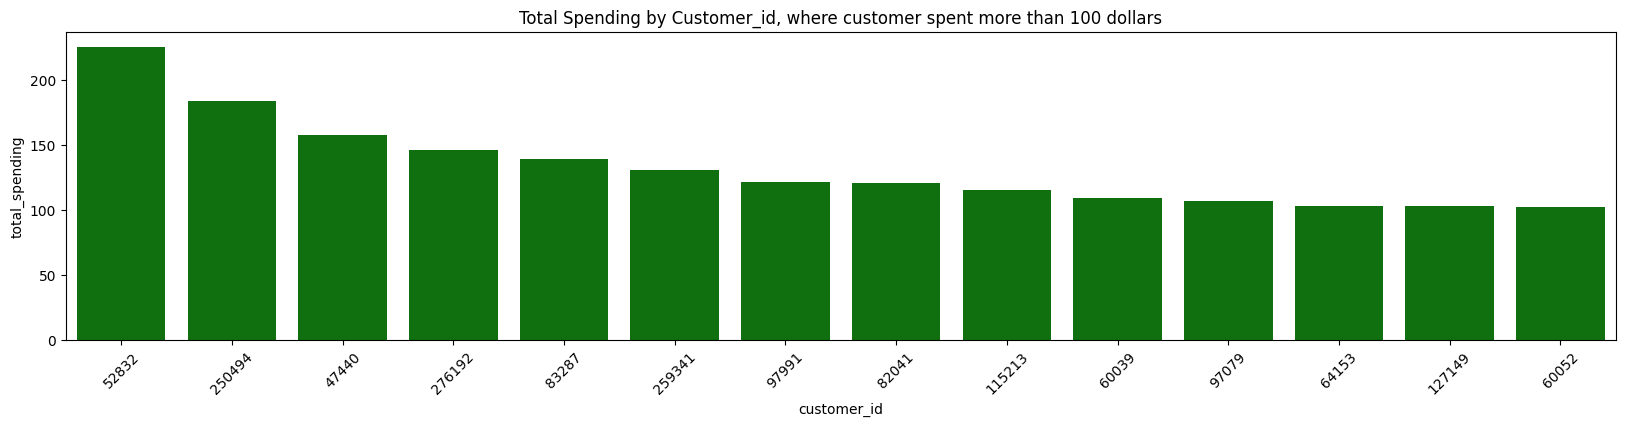

In [ ]:
exp_cust1 = exp_cust.groupby(['customer_id'])['cost_of_the_order'].sum()
exp_cust1 = exp_cust1.sort_values(ascending = False)
exp_cust1 = exp_cust1.reset_index()
exp_cust1['customer_id'] = exp_cust1['customer_id'].astype(str)
exp_cust1.rename(columns={'cost_of_the_order': 'total_spending'}, inplace=True)
exp_cust2 = exp_cust1[exp_cust1['total_spending'] > 100]
exp_cust2.reset_index()

print(exp_cust2)
print('\n')

plt.figure(figsize=(20,4))
plt.xticks(rotation=45)
plt.title('Total Spending by Customer_id, where customer spent more than 100 dollars')
sns.barplot(data=exp_cust2, x='customer_id', y='total_spending', color='green' );
plt.show()

#### Observations


1. There are 14 customers who have a total spending of more than 100 dollars

#### 7. restaurant_name, cuisine_type

In [ ]:
rest_cus = data[['restaurant_name', 'cuisine_type']]
rest_cus.reset_index()
rest_cus

restaurant_name   cuisine_type
0                                   Hangawi         Korean
1                 Blue Ribbon Sushi Izakaya       Japanese
2                               Cafe Habana        Mexican
3                 Blue Ribbon Fried Chicken       American
4                          Dirty Bird to Go       American
...                                     ...            ...
1893  Chipotle Mexican Grill $1.99 Delivery        Mexican
1894                              The Smile       American
1895                      Blue Ribbon Sushi       Japanese
1896                      Jack's Wife Freda  Mediterranean
1897                      Blue Ribbon Sushi       Japanese

[1898 rows x 2 columns]

In [ ]:
most_popular = rest_cus['cuisine_type'].value_counts().idxmax()
print(f'The most popular cuisine  is {most_popular}.')

The most popular cuisine  is American.


American food has been ordered 584 times from 41 restaurants, which makes it the most popular cuisine.


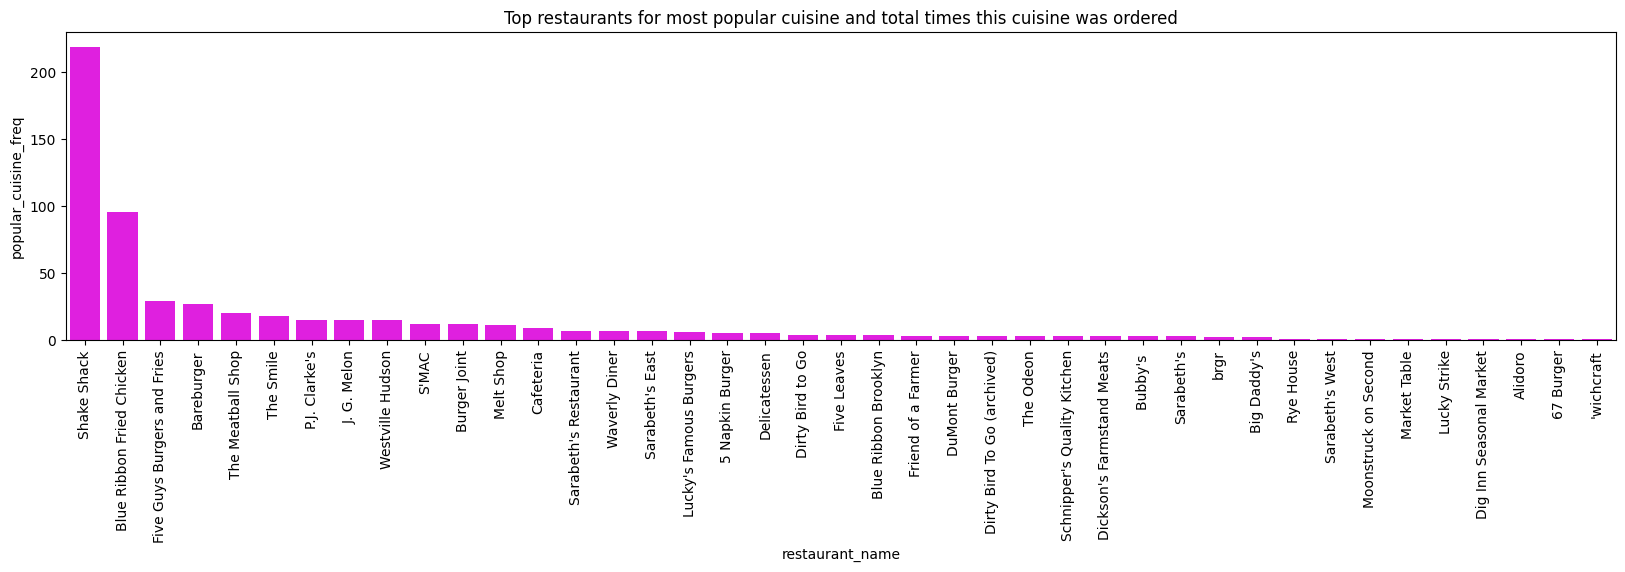

In [ ]:
rest_cus1 = rest_cus[rest_cus['cuisine_type'] == most_popular]
most_pop_freq = rest_cus1.shape[0]
rest_cus1 = rest_cus1.groupby(['restaurant_name'])['cuisine_type'].count()
rest_cus1 = rest_cus1.reset_index()
most_pop_freq_res = rest_cus1.shape[0]

print(f'{most_popular} food has been ordered {most_pop_freq} times from {most_pop_freq_res} restaurants, which makes it the most popular cuisine.')

rest_cus2 = rest_cus1.sort_values(by = 'cuisine_type', ascending = False)
rest_cus2.reset_index(drop=True, inplace=True)

rest_cus2.rename(columns={'cuisine_type': 'popular_cuisine_freq'}, inplace=True)

plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.title('Top restaurants for most popular cuisine and total times this cuisine was ordered')
sns.barplot(data=rest_cus2, x='restaurant_name', y='popular_cuisine_freq', color='magenta' );
plt.show()


#### Observations

1. American food has been ordered 584 times from 41 restaurants, which makes it the most popular cuisine.
2. The top restaurant that sells American food is Shake Shack followed by Blue Ribbon Fried Chicken.

#### 8. restaurant_name, revenue

In [ ]:
rest_cost = data[['restaurant_name', 'cost_of_the_order']]
rest_cost.reset_index()
rest_cost

restaurant_name  cost_of_the_order
0                                   Hangawi             30.750
1                 Blue Ribbon Sushi Izakaya             12.080
2                               Cafe Habana             12.230
3                 Blue Ribbon Fried Chicken             29.200
4                          Dirty Bird to Go             11.590
...                                     ...                ...
1893  Chipotle Mexican Grill $1.99 Delivery             22.310
1894                              The Smile             12.180
1895                      Blue Ribbon Sushi             25.220
1896                      Jack's Wife Freda             12.180
1897                      Blue Ribbon Sushi             19.450

[1898 rows x 2 columns]

In [ ]:
rest_cost1 = rest_cost.sort_values(by = 'cost_of_the_order', ascending = False)
rest_cost1.reset_index(drop=True, inplace=True)
total_revenue = rest_cost['cost_of_the_order'].sum()
max_cost= rest_cost['cost_of_the_order'].max()
median_cost = rest_cost['cost_of_the_order'].median()
print('Total revenue = ', total_revenue)
print('Maximum cost = ', max_cost)
print('Median cost = ', median_cost)
print('\n')

# find the restaurants where cost of order is greater than or equal to median cost
rest_cost2 = rest_cost1[rest_cost1['cost_of_the_order'] > median_cost]

revenue_from_top_rest = rest_cost2['cost_of_the_order'].sum()
print('Revenue from expensive orders = ', revenue_from_top_rest)

percent_top_revenue = (revenue_from_top_rest/total_revenue)*100

print('The percentage of revenue from expensive orders is = ', percent_top_revenue.round(2))

# find revenue from each of these restaurants
rest_cost3 = rest_cost2.groupby(['restaurant_name'])['cost_of_the_order'].sum()
rest_cost3 = rest_cost3.reset_index()
rest_cost4 = rest_cost3.sort_values(by = 'cost_of_the_order', ascending = False)

print('\n')

rest_cost4.reset_index(drop=True, inplace=True)

rest_cost4.rename(columns={'cost_of_the_order': 'revenue'}, inplace=True)

rest_cost4

Total revenue =  31314.82
Maximum cost =  35.41
Median cost =  14.14


Revenue from expensive orders =  21308.25
The percentage of revenue from expensive orders is =  68.05




restaurant_name  revenue
0                  Shake Shack 2498.300
1            The Meatball Shop 1447.660
2            Blue Ribbon Sushi 1210.240
3    Blue Ribbon Fried Chicken 1140.690
4                         Parm  767.430
..                         ...      ...
138      Le Zie 2000 Trattoria   15.470
139       Moonstruck on Second   14.940
140                Big Daddy's   14.840
141                Pepe Giallo   14.600
142          Wo Hop Restaurant   14.160

[143 rows x 2 columns]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



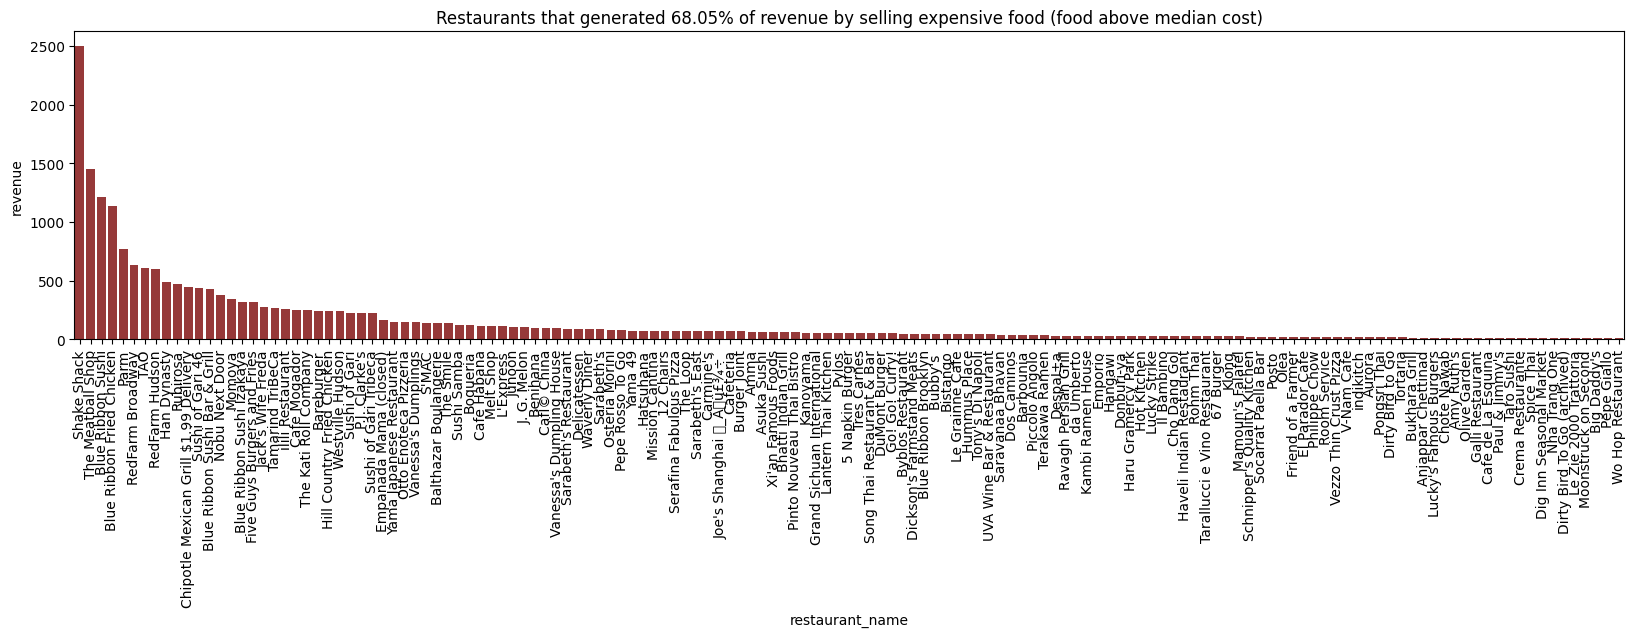

In [ ]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.title(f'Restaurants that generated {percent_top_revenue.round(2)}% of revenue by selling expensive food (food above median cost)')
sns.barplot(data=rest_cost4, x='restaurant_name', y='revenue', color='brown' );
plt.show()

#### Observations

1. Shake Shack tops in generating revenue for the food ordering platform. So far it generated 2498.3 dollars out of the total 31314.82 dollars generated from 178 restaurants on the platform.

#### 9. restaurant_name, average_cost of order

In [ ]:
rest_acost = data[['restaurant_name', 'cost_of_the_order']]
rest_acost.reset_index()
rest_acost

restaurant_name  cost_of_the_order
0                                   Hangawi             30.750
1                 Blue Ribbon Sushi Izakaya             12.080
2                               Cafe Habana             12.230
3                 Blue Ribbon Fried Chicken             29.200
4                          Dirty Bird to Go             11.590
...                                     ...                ...
1893  Chipotle Mexican Grill $1.99 Delivery             22.310
1894                              The Smile             12.180
1895                      Blue Ribbon Sushi             25.220
1896                      Jack's Wife Freda             12.180
1897                      Blue Ribbon Sushi             19.450

[1898 rows x 2 columns]

In [ ]:
rest_acost1 = rest_acost.groupby(['restaurant_name'])['cost_of_the_order'].mean()
rest_acost1 = rest_acost1.sort_values(ascending = False)
rest_acost1 = rest_acost1.reset_index()
rest_acost1.rename(columns={'cost_of_the_order': 'avg_cost'}, inplace=True)

rest_acost1

restaurant_name  avg_cost
0             Kambi Ramen House    32.930
1                       Emporio    31.430
2           Bhatti Indian Grill    31.115
3            Haru Gramercy Park    29.830
4                  Lucky Strike    29.250
..                          ...       ...
173                Market Table     6.790
174                     Wa Jeal     6.740
175      Cipriani Le Specialita     5.920
176  Big Wong Restaurant _¤¾Ñ¼     5.920
177                 Hunan Manor     5.720

[178 rows x 2 columns]

In [ ]:
rest_acost2 = rest_acost1[rest_acost1['avg_cost'] > median_cost]
rest_acost2

restaurant_name  avg_cost
0           Kambi Ramen House    32.930
1                     Emporio    31.430
2         Bhatti Indian Grill    31.115
3          Haru Gramercy Park    29.830
4                Lucky Strike    29.250
..                        ...       ...
115            Terakawa Ramen    14.263
116  Yama Japanese Restaurant    14.255
117  Vanessa's Dumpling House    14.206
118              Cho Dang Gol    14.198
119         Wo Hop Restaurant    14.160

[120 rows x 2 columns]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



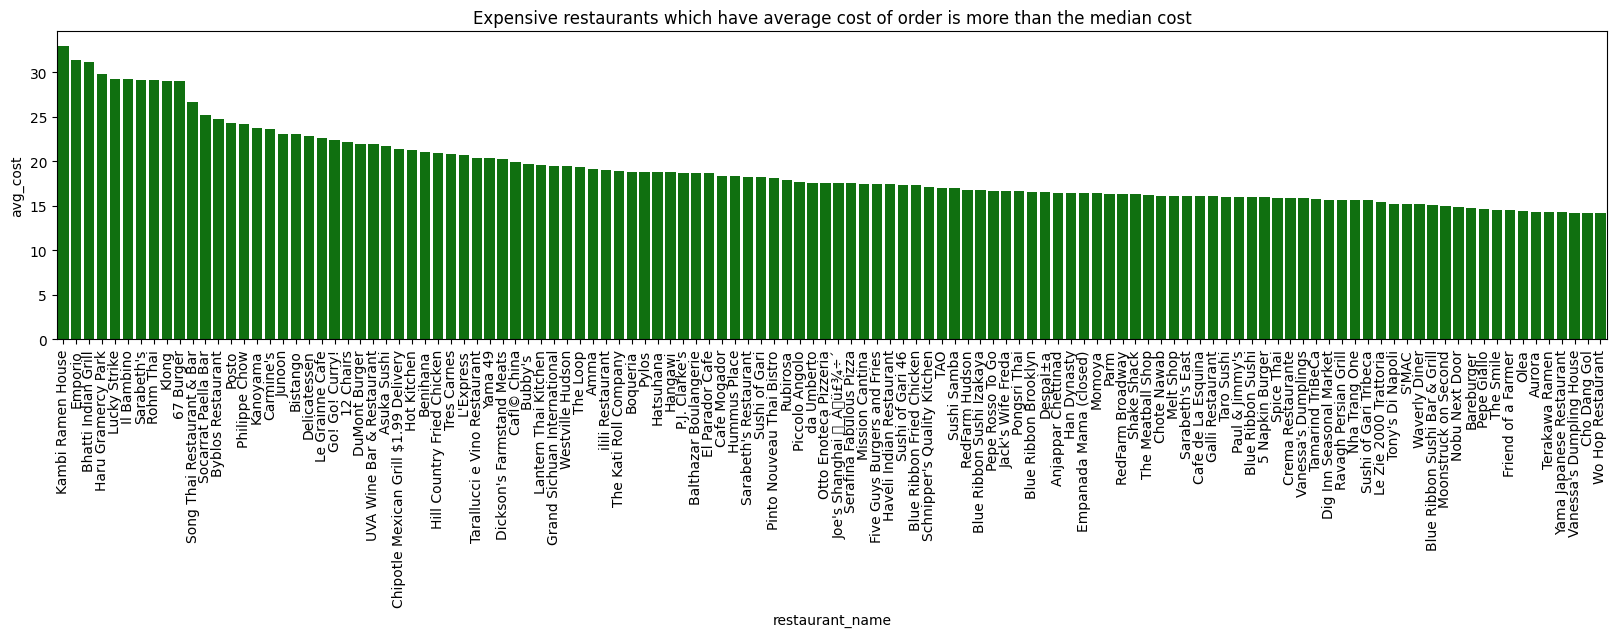

In [ ]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.title(f'Expensive restaurants which have average cost of order is more than the median cost')
sns.barplot(data=rest_acost2, x='restaurant_name', y='avg_cost', color='green' );
plt.show()

#### Observations

1. Kambi Ramen House is the most expensive restaurant where the average cost is 32.93 dollars for an order. Even though it is the most expensive it is not on the top 10 restaurants generating revenue.

#### 10. cuisine_type, cost_of the order

In [ ]:
cus_cost = data[['cuisine_type', 'cost_of_the_order']]
cus_cost.reset_index()
cus_cost

cuisine_type  cost_of_the_order
0            Korean             30.750
1          Japanese             12.080
2           Mexican             12.230
3          American             29.200
4          American             11.590
...             ...                ...
1893        Mexican             22.310
1894       American             12.180
1895       Japanese             25.220
1896  Mediterranean             12.180
1897       Japanese             19.450

[1898 rows x 2 columns]

In [ ]:
cus_cost1 = cus_cost.groupby(['cuisine_type'])['cost_of_the_order'].mean()
cus_cost1 = cus_cost1.sort_values(ascending = False)
cus_cost1 = cus_cost1.reset_index()
cus_cost1.rename(columns={'cost_of_the_order': 'avg_cost'}, inplace=True)

cus_cost1

cuisine_type  avg_cost
0           French    19.794
1         Southern    19.301
2             Thai    19.208
3          Spanish    18.994
4   Middle Eastern    18.821
5          Mexican    16.933
6           Indian    16.920
7          Italian    16.419
8         American    16.320
9          Chinese    16.305
10        Japanese    16.305
11   Mediterranean    15.475
12          Korean    14.002
13      Vietnamese    12.883

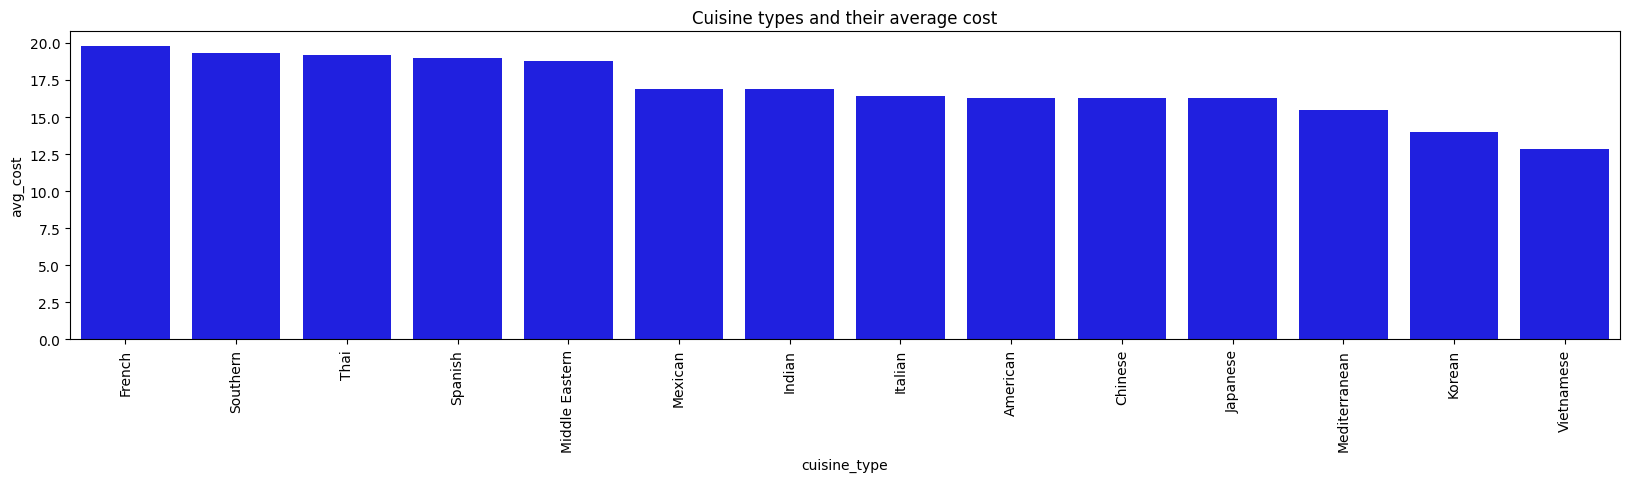

In [ ]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.title(f'Cuisine types and their average cost')
sns.barplot(data=cus_cost1, x='cuisine_type', y='avg_cost', color='blue' );
plt.show()

#### Observations

1. French cuisine is most expensive
2. Vietnamese is the least expensive.

#### 11. cost_of order, day of week

In [ ]:
cost_dow = data[['day_of_the_week', 'cost_of_the_order']]
cost_dow.reset_index()
cost_dow

day_of_the_week  cost_of_the_order
0            Weekend             30.750
1            Weekend             12.080
2            Weekday             12.230
3            Weekend             29.200
4            Weekday             11.590
...              ...                ...
1893         Weekend             22.310
1894         Weekend             12.180
1895         Weekday             25.220
1896         Weekday             12.180
1897         Weekend             19.450

[1898 rows x 2 columns]

In [ ]:
mean_values = cost_dow.groupby(['day_of_the_week'])['cost_of_the_order'].mean().reset_index()
cost_dow1 = cost_dow.merge(mean_values, on=['day_of_the_week'], suffixes=('', '_mean'))
cost_dow1.rename(columns={'cost_of_the_order_mean': 'average_cost'}, inplace=True)
cost_dow1.rename(columns={'cost_of_the_order': 'total_revenue'}, inplace=True)
cost_dow2 = cost_dow1.groupby(['day_of_the_week', 'average_cost'])['total_revenue'].sum()
cost_dow2 = cost_dow2.reset_index()
cost_dow2

day_of_the_week  average_cost  total_revenue
0         Weekday        16.311       8922.220
1         Weekend        16.575      22392.600

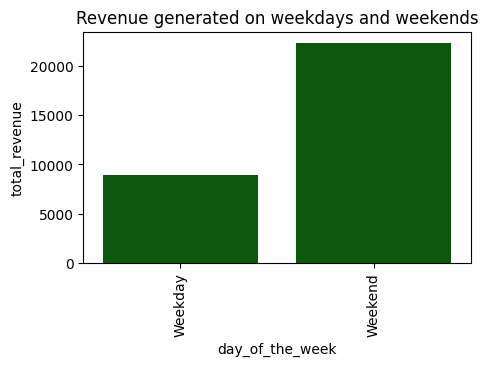

In [ ]:
plt.figure(figsize=(5,3))
plt.xticks(rotation=90)
plt.title(f'Revenue generated on weekdays and weekends')
sns.barplot(data=cost_dow2, x='day_of_the_week', y='total_revenue', color='darkgreen' );
plt.show()

#### Observations

1. Total Revenue generated on Weekends is more than those on weekdays.
2. Average cost of an order is less on Weekdays as compared to Weekends.

#### 12. day_of_week, restaurant_name

In [ ]:
dow_rest = data[['day_of_the_week', 'restaurant_name']]
dow_rest.reset_index()
dow_rest

day_of_the_week                        restaurant_name
0            Weekend                                Hangawi
1            Weekend              Blue Ribbon Sushi Izakaya
2            Weekday                            Cafe Habana
3            Weekend              Blue Ribbon Fried Chicken
4            Weekday                       Dirty Bird to Go
...              ...                                    ...
1893         Weekend  Chipotle Mexican Grill $1.99 Delivery
1894         Weekend                              The Smile
1895         Weekday                      Blue Ribbon Sushi
1896         Weekday                      Jack's Wife Freda
1897         Weekend                      Blue Ribbon Sushi

[1898 rows x 2 columns]

In [ ]:
rest_counts = dow_rest.groupby(['day_of_the_week'])['restaurant_name'].value_counts().reset_index()
rest_counts

day_of_the_week            restaurant_name  count
0           Weekday                Shake Shack     74
1           Weekday          The Meatball Shop     37
2           Weekday          Blue Ribbon Sushi     34
3           Weekday                       Parm     26
4           Weekday  Blue Ribbon Fried Chicken     22
..              ...                        ...    ...
275         Weekend                     Hibino      1
276         Weekend   Haveli Indian Restaurant      1
277         Weekend        Hampton Chutney Co.      1
278         Weekend                     Haandi      1
279         Weekend           Galli Restaurant      1

[280 rows x 3 columns]

In [ ]:
rest_counts_weekday = rest_counts[rest_counts['day_of_the_week'] == 'Weekday']
rest_counts_weekend = rest_counts[rest_counts['day_of_the_week'] == 'Weekend']


In [ ]:
rest_counts_weekday

day_of_the_week            restaurant_name  count
0           Weekday                Shake Shack     74
1           Weekday          The Meatball Shop     37
2           Weekday          Blue Ribbon Sushi     34
3           Weekday                       Parm     26
4           Weekday  Blue Ribbon Fried Chicken     22
..              ...                        ...    ...
116         Weekday                Sushi Samba      1
117         Weekday                Izakaya Ten      1
118         Weekday   Joe's Shanghai _Àü£¾÷´      1
119         Weekday     Vezzo Thin Crust Pizza      1
120         Weekday                 'wichcraft      1

[121 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 140 (\x8c) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



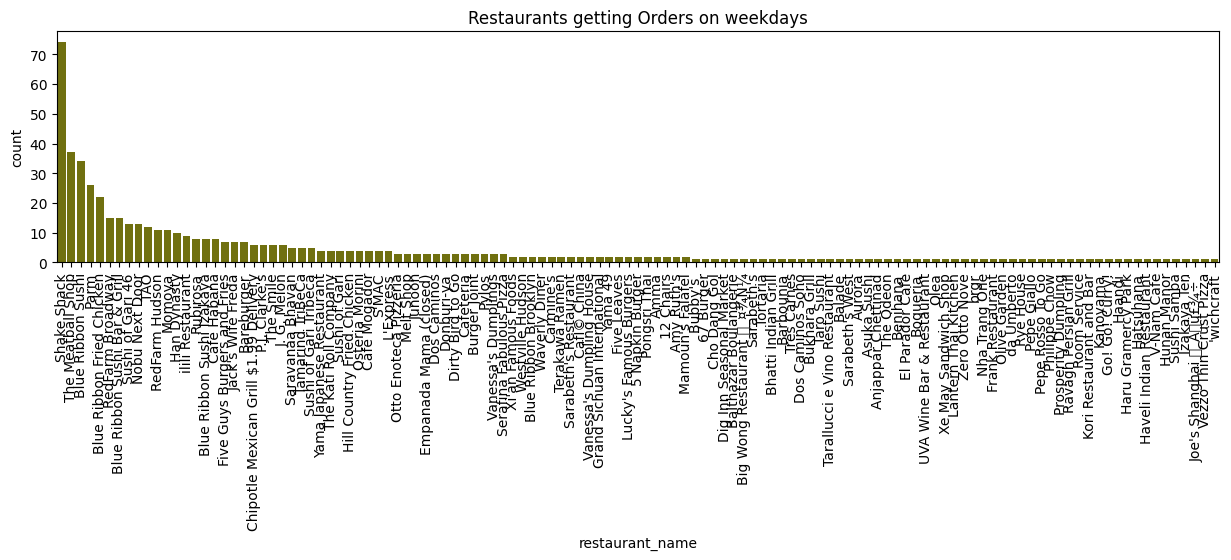

In [ ]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)
plt.title(f'Restaurants getting Orders on weekdays')
sns.barplot(data=rest_counts_weekday, x='restaurant_name', y='count', color='olive' );
plt.show()

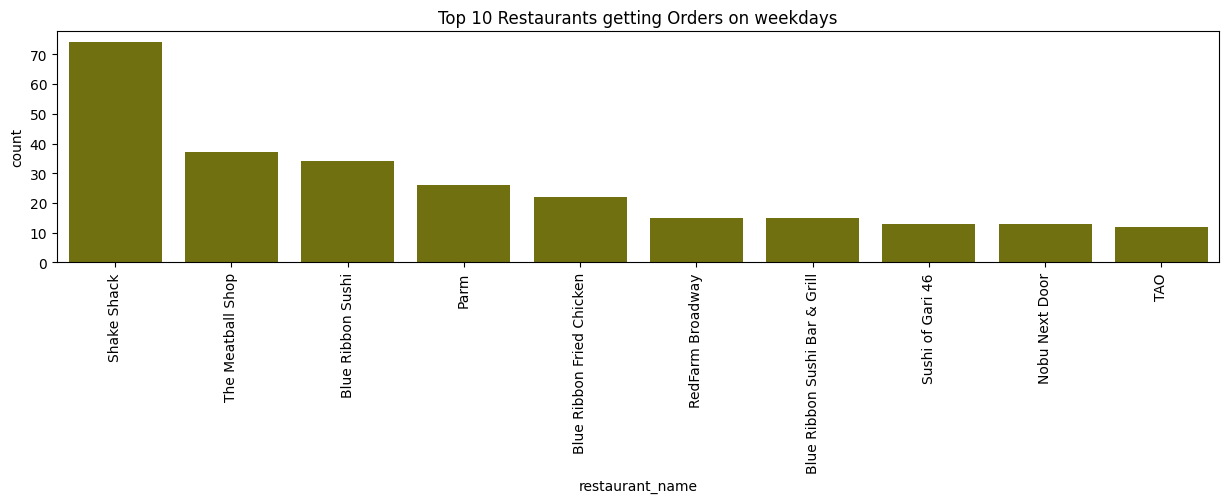

In [ ]:
rest_counts_weekday_top = rest_counts_weekday.head(10)
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)
plt.title(f'Top 10 Restaurants getting Orders on weekdays')
sns.barplot(data=rest_counts_weekday_top, x='restaurant_name', y='count', color='olive' );
plt.show()

In [ ]:
rest_counts_weekend

day_of_the_week            restaurant_name  count
121         Weekend                Shake Shack    145
122         Weekend          The Meatball Shop     95
123         Weekend          Blue Ribbon Sushi     85
124         Weekend  Blue Ribbon Fried Chicken     74
125         Weekend             RedFarm Hudson     44
..              ...                        ...    ...
275         Weekend                     Hibino      1
276         Weekend   Haveli Indian Restaurant      1
277         Weekend        Hampton Chutney Co.      1
278         Weekend                     Haandi      1
279         Weekend           Galli Restaurant      1

[159 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



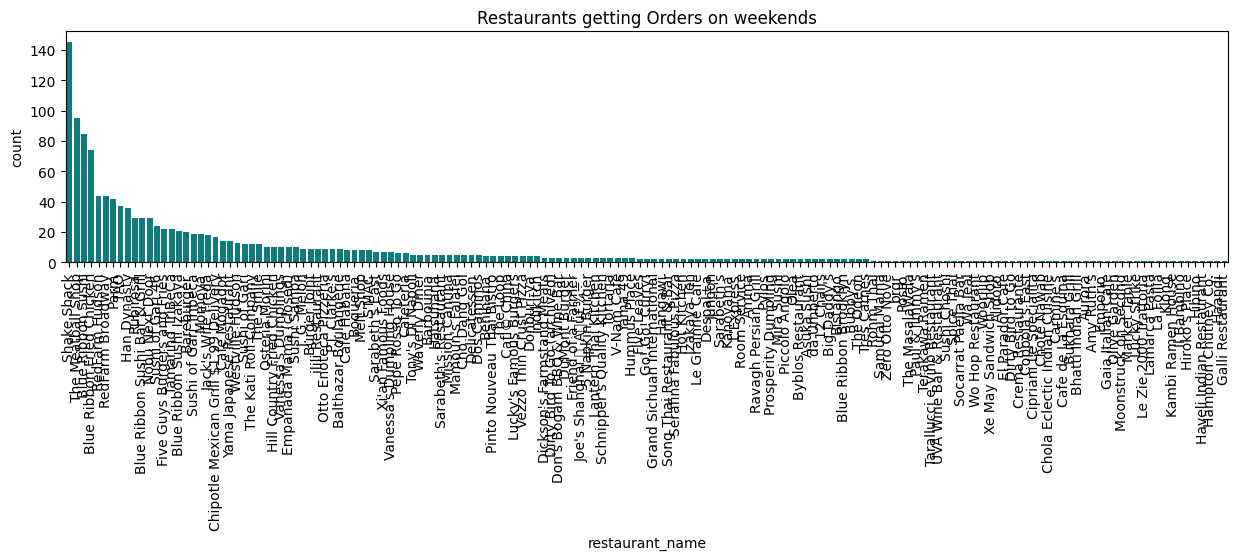

In [ ]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)
plt.title(f'Restaurants getting Orders on weekends')
sns.barplot(data=rest_counts_weekend, x='restaurant_name', y='count', color='darkcyan' );
plt.show()

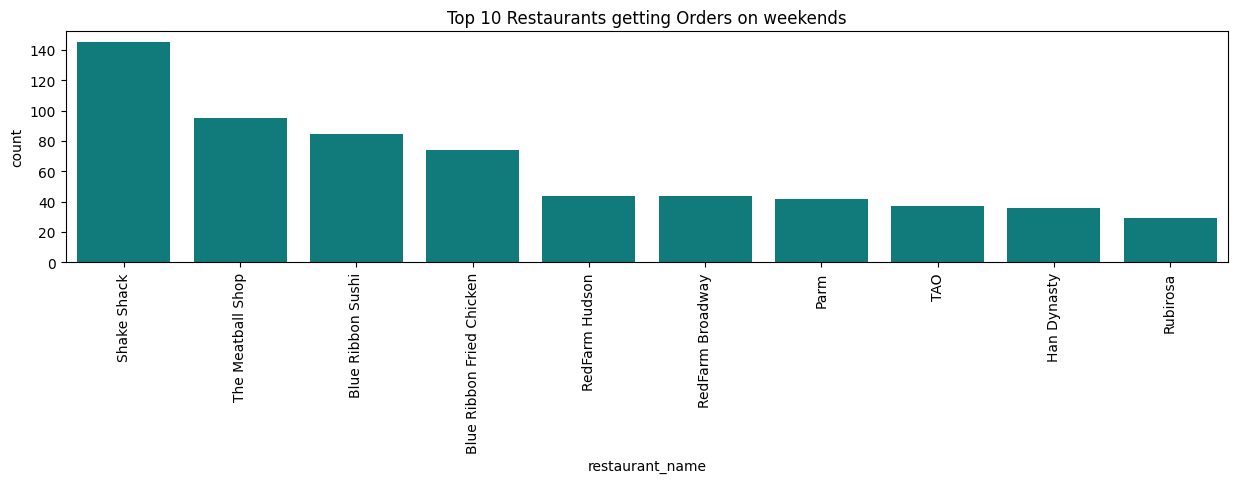

In [ ]:
rest_counts_weekend_top = rest_counts_weekend.head(10)
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)
plt.title(f'Top 10 Restaurants getting Orders on weekends')
sns.barplot(data=rest_counts_weekend_top, x='restaurant_name', y='count', color='darkcyan' );
plt.show()

#### Observations

1. Shake Shack is popular restaurant on weekends as well as weekdays, so is The Meatball Shop	 and Blue Ribbon Sushi.
2. Parm is more popular on weekdays as compared to weekends

#### Delivery time and day of the week

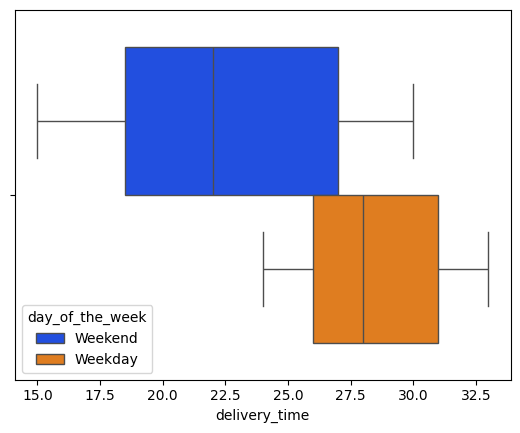

In [ ]:
sns.boxplot(data = data, x = 'delivery_time', hue = 'day_of_the_week' , palette = 'bright');

#### Observations


1. It takes more time to deliver food on weekdays as compared to weekends. Though sometimes the delivery takes similar duration whether it is weekday or weekends.

#### 14 total time and day of the week

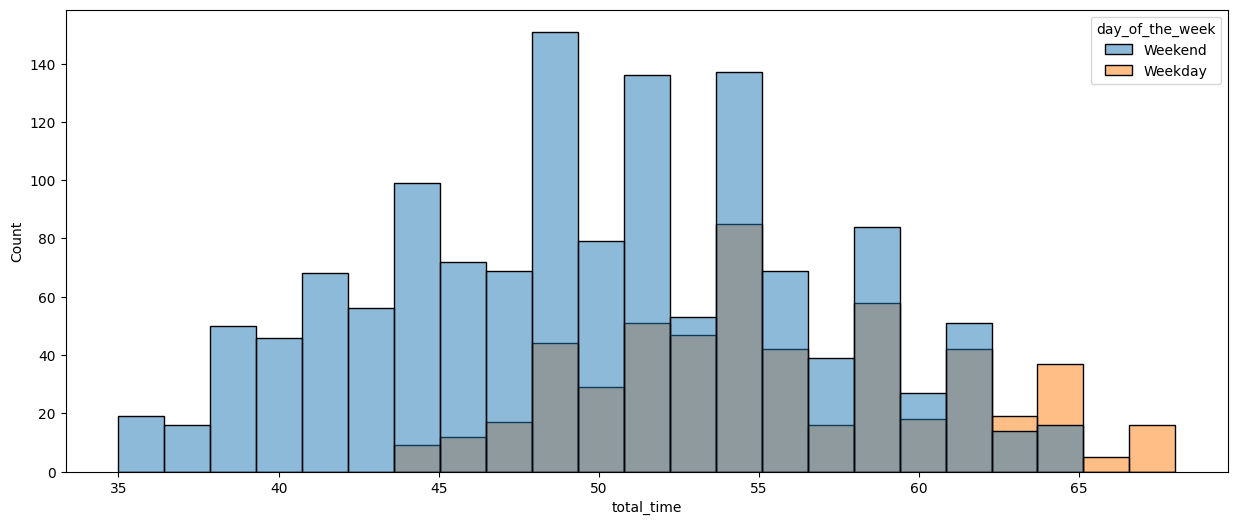

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data=cdata, x='total_time', hue = 'day_of_the_week');

#### Observations

1. Total time on weekdays is more than the weekends. As you can see on weekends some orders are delivered even below 40 minutes, but that is not the case on weekdays.

#### 15 Correlation Matrix - for Numerical attributes

In [ ]:
corr_matrix = data.corr(numeric_only = 'True')

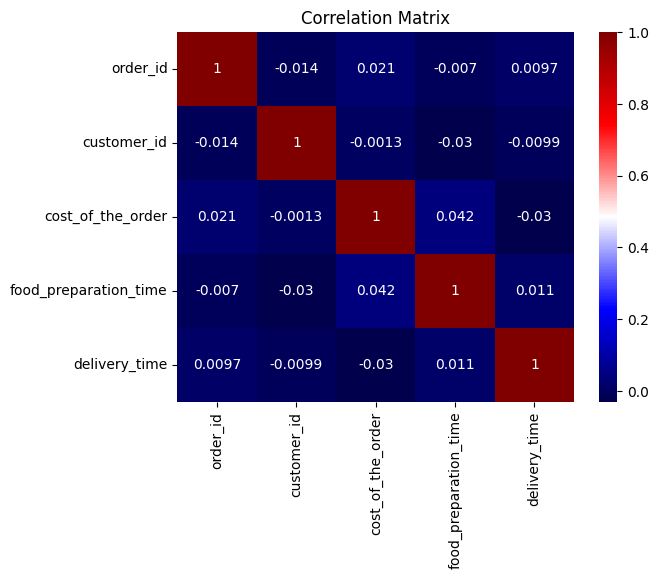

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='seismic')
plt.title('Correlation Matrix')
plt.show()

#### Observations

1. Food preparation time and cost are highly corelated as compared to other attributes

#### 16 Pairplot

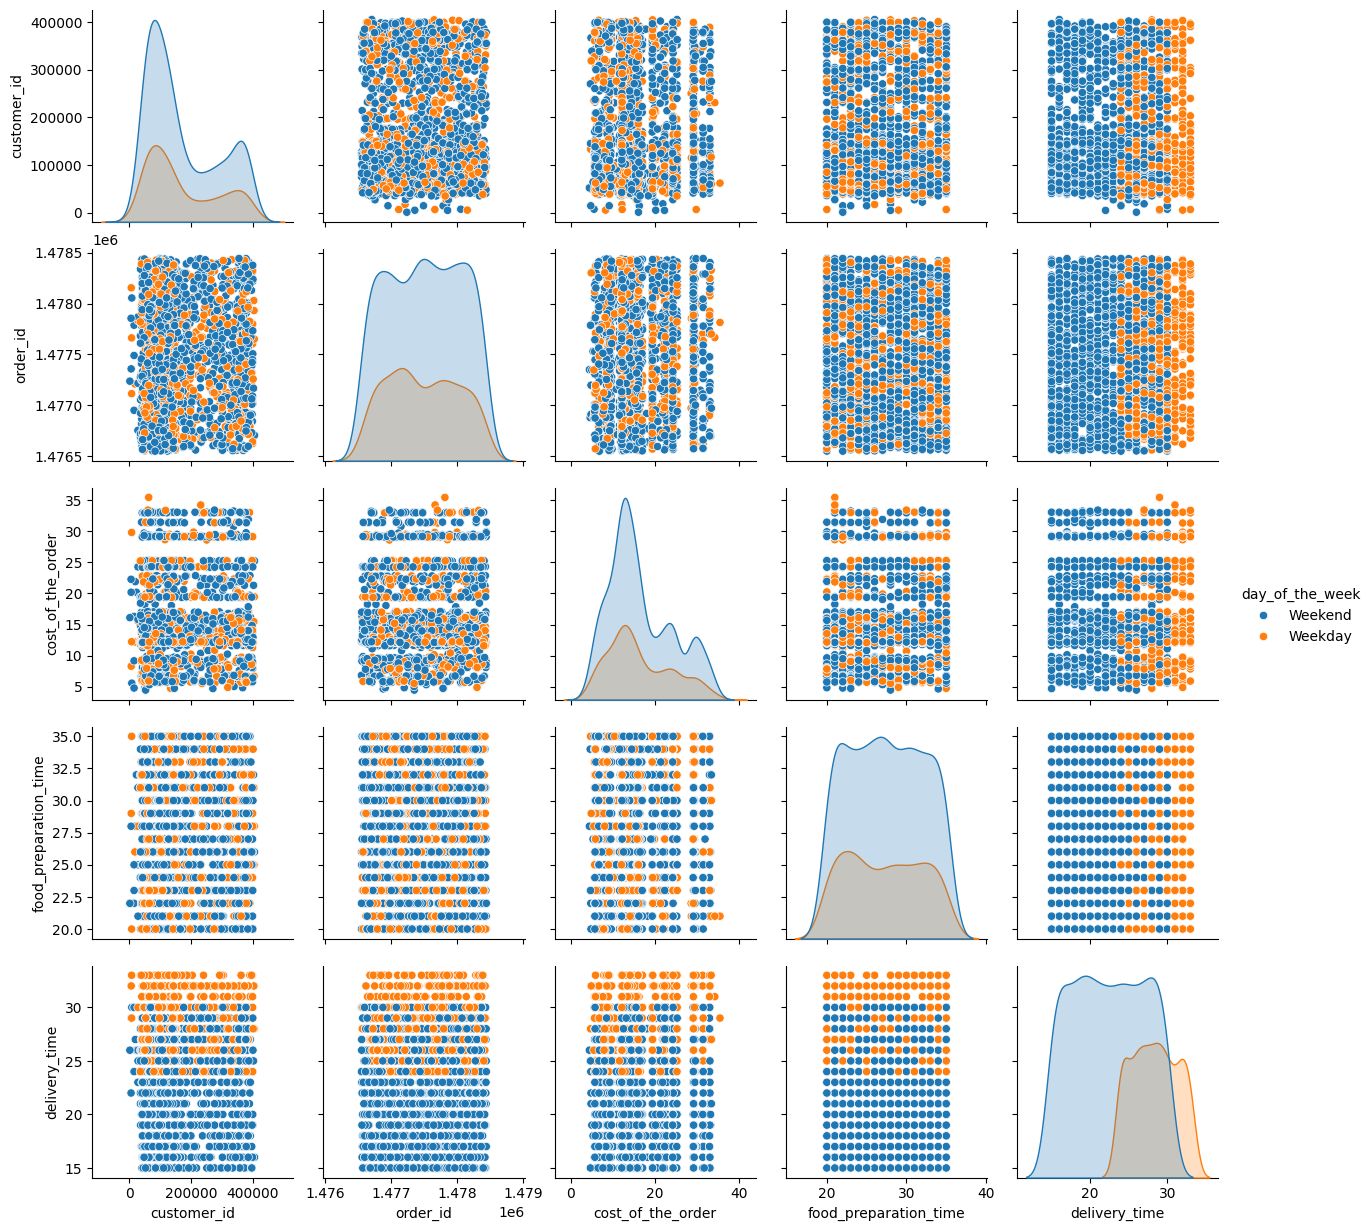

In [ ]:
sns.pairplot(data=data, vars=['customer_id','order_id','cost_of_the_order','food_preparation_time', 'delivery_time'], hue='day_of_the_week');

#### Observations

1. The pair plot doesn't provide much information on the relationships in this case

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Write the code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# as the datatype of 'rating' column in original dataset is string, lets create a copy
data2 = data.copy()

In [ ]:
# let's not filter the dataset and keep only those records in new dataframe that has a rating value (and is not equal to 'Not given')
new_df = data2[data2['rating'] != 'Not given']

In [ ]:
# convert the rating column to integer type
new_df['rating'] = new_df['rating'].astype(int);

<ipython-input-588-4ade535261c2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# check datatype of rating column (as you can see its integer now)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


In [ ]:
# find the rating count for each restaurant in the dataset
filtered_df = new_df.groupby(['restaurant_name'])['rating'].count()
filtered_df1 = filtered_df.reset_index()

# find the restaurants with rating count greater than 50
filtered_df2 = filtered_df1[filtered_df1['rating'] > 50]

filtered_df2.rename(columns={'rating': 'rating_count'}, inplace=True)


print(f'The list of restaurants having more than 50 ratings along with their rating count is as follows:\n\n {filtered_df2}')

# get the list of restaurants that have rating count greater than 50 into a list
column_values_list = [value for value in filtered_df2['restaurant_name']]

# create a sub-set dataframe that consists of only the records for the restaurants in the above list
filtered_df3 = new_df[new_df['restaurant_name'].isin(column_values_list)]

# calculate the mean/avg rating for each of the restaurant in above list.
filtered_df4 = (filtered_df3.groupby(['restaurant_name'])['rating'].mean())


final_list_of_restaurants = filtered_df4.reset_index()
final_list_of_restaurants.rename(columns={'rating': 'average_rating'}, inplace=True)


print(f'\nThe final list of restaurnats that have more than 50 ratings and average rating greater than 4 along with their average rating is as follows:\n\n {final_list_of_restaurants}');

The list of restaurants having more than 50 ratings along with their rating count is as follows:

                restaurant_name  rating_count
16   Blue Ribbon Fried Chicken            64
17           Blue Ribbon Sushi            73
117                Shake Shack           133
132          The Meatball Shop            84

The final list of restaurnats that have more than 50 ratings and average rating greater than 4 along with their average rating is as follows:

              restaurant_name  average_rating
0  Blue Ribbon Fried Chicken           4.328
1          Blue Ribbon Sushi           4.219
2                Shake Shack           4.278
3          The Meatball Shop           4.512


<ipython-input-590-c79e3ee6fed8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px
bar = px.bar(filtered_df2, x='restaurant_name', y='rating_count')
bar.show()

In [ ]:
bar = px.bar(final_list_of_restaurants, x='restaurant_name', y='average_rating')
bar.show()

#### Observations

1. As you  can see from the output and the graph, the restaurants to get more than 50 ratings are Shake Shak, The Meatball Shop, Blue Ribbon Sushi & Blue Ribbon Fried Chicken with number of ratings as 133,84, 73 & 64 respectively.
2. Even though Shake Shak tops the list of restaurants that got the most number of ratings, its average rating is less than Blue Ribbon Fried Chicken & The Meatball Shop.


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Write the code here
data3 = data.copy()

# Create new column with default value
data3['revenue'] = 0.0

# Apply conditions with calculated values
data3.loc[(data3['cost_of_the_order'] > 20 ), 'revenue'] = (data3['cost_of_the_order'] * 0.25)
data3.loc[(data3['cost_of_the_order'] > 20 ), 'revenu_cat'] = 'High'
data3.loc[(data3['cost_of_the_order'] > 5 ) & (data3['cost_of_the_order'] <= 20 ), 'revenue'] = (data3['cost_of_the_order'] * 0.15)
data3.loc[(data3['cost_of_the_order'] > 5 ) & (data3['cost_of_the_order'] <= 20 ), 'revenu_cat'] = 'Medium'
data3.loc[(data3['cost_of_the_order'] <= 5 ), 'revenu_cat'] = 'NIL'

net_revenue = data3['revenue'].sum()

print(f'The net revenue generated by the company across all orders is {net_revenue.round(2)} dollars\n');

The net revenue generated by the company across all orders is 6166.3 dollars



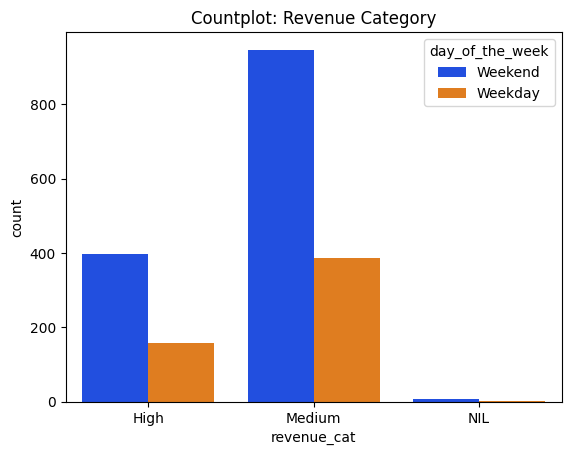

In [ ]:
plt.title('Countplot: Revenue Category')
plt.xlabel('revenue_cat')
sns.countplot(data=data3, x='revenu_cat', hue = 'day_of_the_week', palette = 'bright');

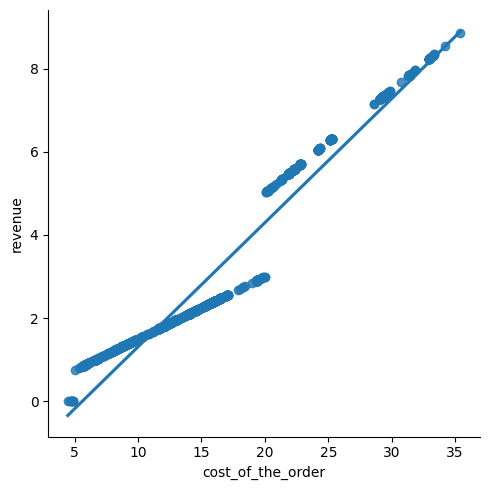

In [ ]:
sns.lmplot(data=data3, x='cost_of_the_order', y='revenue');

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   revenue                1898 non-null   float64
 10  revenu_cat             1898 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 163.2+ KB


#### Observations

1. The net revenue generated by the company across all orders is 6166.3 dollars



### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Write the code here
data4 = data.copy()

# Create new column for total_time
data4['total_time'] = data4['food_preparation_time'] + data4['delivery_time']

filtered_data = data4[data4['total_time'] > 60]

percentage_delayed_orders = ((filtered_data.shape[0]/data4.shape[0]) * 100)

print(f'The number of orders that took more than 60 minutes to get delivered is {filtered_data.shape[0]}' )
print(f'The percentage of orders that took more than 60 minutes to get delivered is {"%.2f" % percentage_delayed_orders}%' )

The number of orders that took more than 60 minutes to get delivered is 200
The percentage of orders that took more than 60 minutes to get delivered is 10.54%


#### Observations

1. There were 200 orders that took more than 60 minutes to get delivered from the time the order was placed and till the time it was delivered that constitutes to 10.54% of the total orders placed.


### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
new_df2 = data.groupby(['day_of_the_week'])['delivery_time'].mean()
print(new_df2)

day_of_the_week
Weekday   28.340
Weekend   22.470
Name: delivery_time, dtype: float64


#### Observations

1. The average delivery time during weekends is lower than the average delivery time during weekdays (probably due to the traffic on weekdays as many people are travelling to/back from work).
2. On an average delivery time takes roughly 5 to 6 mins more on weekdays as compared to weekends.
3. On weekdays it takes on an average 28.34 minutes to deliver food (after it has been picked up from the restaurant).
4. On weekends it takes on an average 22.47 minutes to deliver food (after it has been picked up from the restaurant).


### Conclusion and Recommendations

### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)




### Conclusions:


1. There are orders ranging from 4.47 dollars to 35.41
2. The average food preparation time is not impacted by the day when the order was placed.
3. There are no outliers in cost or delivery and preparation times
4. A few restaurants like Shake Shack, The Meatball Shop etc. are more famous and bulk of customers prefer these restaurants due to them offering popular cuisines and being reasonably priced (do not top expensive restaurants).
5. There are 178 unique restaurants on this platform
6. There are 14 different cuisine types that these 178 restaurants together have.
7. American cuisine is the most popular cuisine
8. A large %age (more than one third, i.e. 38.78%) of the orders have not been rated.
9. An order is delivered in 52 minutes on an average.
10. The top 5 restaurants in terms of number of orders received constitute to 33.4% of total orders.
11. Rating is not impacted by order delivery time, which means its mostly based on food quality and cuisine.
12. There are 47 restaurants with an average rating of 5.
13. There are 14 customers who have a total spending of more than 100 dollars.
14. Shake Shack is a prominent revenue generator.
15. The most expensive restaurants are not popular.
16. French cuisine is most expensive, though in popularity it is 5th from the bottom.
17. Average cost of an order is more on weekends and so is the number of orders.
18. Some restaurants are popular on weekdays as well as on weekends but some others like Parm is more popular on weekdays.
19. Overall there are more orders on Weekends as compared to Weekdays.


### Recommendations:


1. The cost of the expensive and least popular cuisines must be reduced, as people won't even try these being highly priced.
2. The platform must make rating as mandatory, or come up with approaches to encourage customers to rate their order. Like providing a discount on next order if they have rated all their previous orders.
3. The app should recommend the less popular cuisines as well, using 'you might also like' options, and also provide a section where they can read about the various cuisines and their speciality as some people are hesitant to try new things.
4. The restaurants that are more popular on weekdays must check why they are not having enough customers on weekends, it could be related to the cuisines that are more popular on weekends as compared to weekdays.
5. The customer who have given high ratings must be given offers to invite other customers onto the platform.
6. The top 5 restaurants that constitute to 33.4% of orders must start promotional offers for their customers to try less popular cuisines.
7. The 200 orders that took more than 60 minutes to get delivered from the time the order was placed and till the time it was delivered that constitutes to 10.54% of the total orders placed must be analysed for the reason for this high duration so that corrective measures can be taken before it starts impacting the customer base.
8. Additional commission% can be based on the total revenue earned by the restaurant during a financial month on cost of orders in addition to just the %on cost of orders.